# <span style="color:orange">SMORE analysis of the preoptic area of mouse hypothalamus</span>

This notebook applies SMORE algorithm on the preoptic area of mouse hypothalamus dataset obtained from [here](https://www.science.org/doi/10.1126/science.aau5324). A subset of this dataset is selected for analysis in this experiment and the related files are provided in the data folder. See the main [SMORE paper](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-024-03467-5) for more details on this dataset. 
Initializing the settings required for running Smore. We run this example notebook on length-2 motifs, you can increase that to higher lengths.

In [1]:
clearvars all 
options.WMotif=2; % length of the output motif   

In [2]:
    dataFolder.input='data/hypo2D/hypo2D.csv'; % input meta data which includes section id, cell type and spatial coordinates
    dataFolder.gexFilename='data/hypo2D/hypo2DGEx.csv'; % input csv table or sparse formatted gene expression in 
    % The compressed sparse row (CSR) format
    dataFolder.gAnotFilename=''; % input gene names, if gexFilename is csv, table column names are assumed to be gene names
    dataFolder.output='output/hypo2D'; % the relative path for saving the results
    options.nMotifs=30; % number of output motifs 
    options.gMode='delaunay'; % (delaunay,knn,epsilon) graph generation strategy
    options.ND=0; % is data more than 2D
    options.nNeighs=6; % used in case of knn
    options.rEps=0; % used in case of epsilon graph
    options.samplingFreq=1; % urpen sampling frequency
    options.shuffleMode='shuffle'; % (shuffle, kernel) method for generating the control data
    options.fixedTypes=0; % fixed types, 0 means no cell type is fixed
    options.neighDepth=4; % used in the case of kernel method for generating the control data
    options.nTrain=10; % number of train replicates, higher precision with higher numbers
    options.nScore=2; % number of repeats for hold-out scoring, only affects the order of output motifs not their structure
    options.isEnrich=false; % perform enrichment, takes more time if enabled. 
    options.doGEA=true; % perform differential gene expression analysis 
    options.iSPGEx=false; % if input gene expression data is csr sparse formatted, otherwise it's csv. 
    options.gePvalMin=1e-3; % minimum pvalue fot differential gene expression analysis
    options.isGEByTissue=true; % compare gene expression within each tissue section separately, set true if there is heterogeneity among tissues to prevent false positives. 
    options.isHGenEx=true;
    % more advanced and test settings
    options.nEval=25;
    options.nRefine=4;
    options.nRefineIter=20;
    options.disObvs=false;
    options.diffMotif=false; 
    options.geRandTest=false; 

Set working directory and add paths and create an output folder to save the restuls

In [3]:
parentFOlder='D:/nucla/P1/mcodes/SMORE/'; % the parent directory that contains func, data and output folders
addpath(parentFOlder)
addpath(strcat(parentFOlder, 'func'))
addpath(strcat(parentFOlder, 'func/graph'))
dataFolder.output=strcat(parentFOlder, dataFolder.output);
dataFolder.gexFilename=strcat(parentFOlder, dataFolder.gexFilename);
dataFolder.input=strcat(parentFOlder, dataFolder.input);
dataFolder

dataFolder = struct with fields:
            input: 'D:/nucla/P1/mcodes/SMORE/data/hypo2D/hypo2D.csv'
      gexFilename: 'D:/nucla/P1/mcodes/SMORE/data/hypo2D/hypo2DGEx.csv'
    gAnotFilename: ''
           output: 'D:/nucla/P1/mcodes/SMORE/output/hypo2D'

In [4]:
outputFolderName=strcat(dataFolder.output, '/');    
outputFolderName=strcat(outputFolderName, 'W', num2str(options.WMotif), '_',string(datetime('today')), '/');
mNodefilename=strcat(outputFolderName, 'ppHMNodesCell.mat');

if ~exist(outputFolderName, 'dir')
    mkdir(outputFolderName)
end
outputFolderName

outputFolderName = "D:/nucla/P1/mcodes/SMORE/output/hypo2D/W2_28-Jan-2025/"

## Creat graph

In [5]:
folderName=dataFolder.input;
cgOptions.isJClusterID=false;
cgOptions.isNoiseCTS=true;
cgOptions.plotGraph=false;
cgOptions.isUniformWeight=true;
cgOptions.isRandom=false;
cgOptions.randCoords=false;
cgOptions.gMode=options.gMode; % "delaunay" or "knn", or "epsilon"
cgOptions.nNeighs=options.nNeighs;
cgOptions.rEps=options.rEps;
cgOptions.rEpsilon=0;
cgOptions.xyNoiseStd=0;
cgOptions.nNeighs=options.nNeighs;
cgOptions.ND=options.ND;
cgOptions.SIDSel=[];
cgOptions.cellTypeName='cellType';
cgOptions.iSelROI=false; 
cgOptions.xyLTh=[1e4, 1e4]; 
cgOptions.xyHTh=[5e4, 5e4];
cgOptions.isDiscardCellType=false;

cgOptions.isTileSIDs=true;
[G,gStruct,cidNOut, ocellTypesOne, haveZ, tissueIDs, TOut]=creatAGraph(folderName,cgOptions);
cellTypesOne=string(ocellTypesOne(:));
cTypeChars = ['ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz', char((198:198+length(ocellTypesOne)-53))];
alphabet=cTypeChars(1:length(ocellTypesOne));

## Plot graph


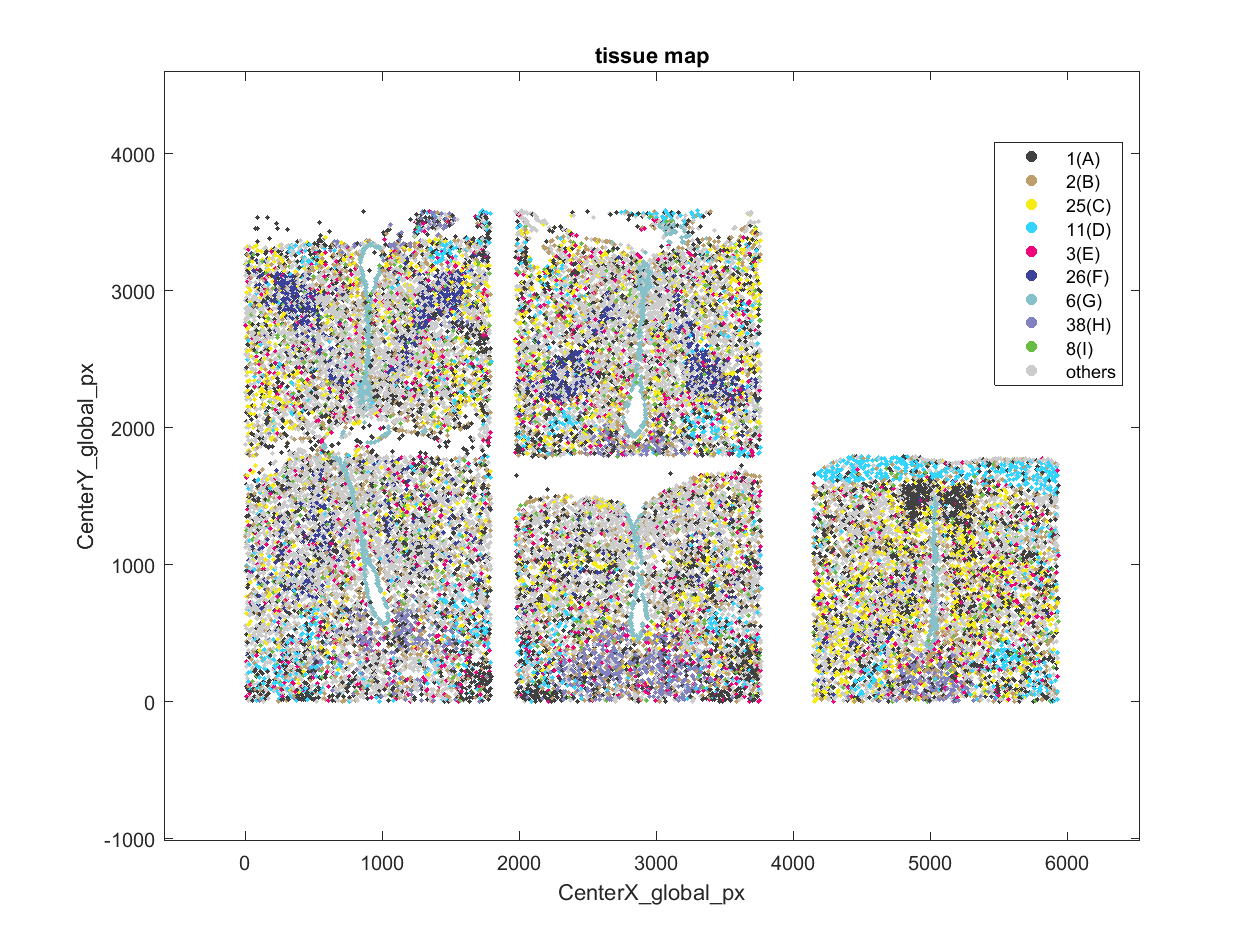

In [6]:

if haveZ
    gHLoptions.is3D=true;
else
    gHLoptions.is3D=false;
end
gHLoptions.isPlotEdges=false;
gHLoptions.ctAnnot=cellTypesOne;
gHLoptions.tissueIDs=tissueIDs;
gHLoptions.iSideView=false;
gHLoptions.alphabet=alphabet;
gHLoptions.folderName=outputFolderName;
gHLoptions.isShuffled=false;
gHLoptions.ncolorL= {'414141';
'BD9F6D';
'F6EB14';
'33D4FF';
'ED047A';
'3C419A';
'86C0C8';
'8282BE';
'69BD45';
'33FFF1'};
gHLoptions.numHLight=9; % number of highlighted cell types
gHLoptions.hLOffset=0; % 0 means first most frequent numHLight cell types are highlighted, 
% otherwise fisrt hLOffset most frequent ones are discarded

plotHLightGraph(G, G.Nodes.label(:, 1), gHLoptions);
% custom axis label
ylabel("CenterY\_global\_px")
xlabel("CenterX\_global\_px")

We can plot the next 9 cell types as well,

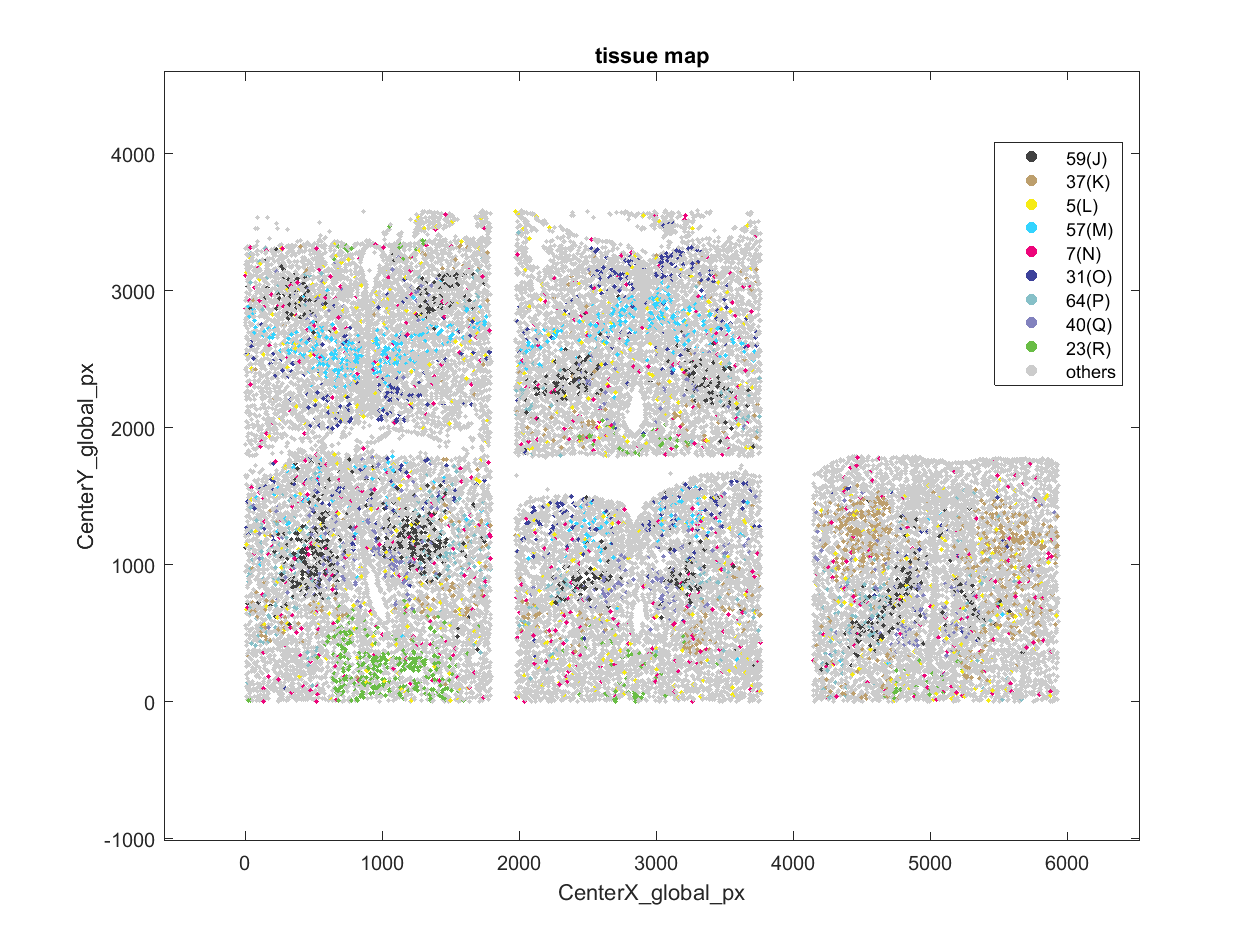

In [7]:
close(gcf)
gHLoptions.numHLight=9; 
gHLoptions.hLOffset=9; 
plotHLightGraph(G, G.Nodes.label(:, 1), gHLoptions);

% custom axis label 
ylabel("CenterY\_global\_px")
xlabel("CenterX\_global\_px")

## Sample paths from the graph using URPEN


In [8]:
close(gcf);
rng(1240); % reproducibility
statOut=sprintf('Sampling input graph with %d nodes and %d edges, with sampling frequency %1.2f\n',...
    length(gStruct.labels(:, 1)),length(G.Edges.EndNodes),options.samplingFreq);
sampleSpecs=statOut;
fprintf(statOut);
W=options.WMotif;
cPTypes=(G.Nodes.label(:, 1)).';
samPro=options.samplingFreq; % sampling frequency
enOptions.pdv=[ones(1,W-1), samPro];
enOptions.k=W; % sample length
enOptions.isChRadial=true; % samples are radial
enOptions.disObvs=options.disObvs;
enOptions.cPTypes=cPTypes(:);
URPENTimerValue=tic;
if W>2
    [pathList, ~, nodeSections, pathWeights]=URPEN(gStruct,enOptions);
else
    % W=2 is just the set of the edges for the graph
    pathList=G.Edges.EndNodes;
    nodeSections=gStruct.labels(pathList(:, 1), 2);
    pathWeights=G.Edges.Weight;
    pathList=num2cell(pathList, 2);

end
URPENElapsedTime=toc(URPENTimerValue);
statURPENG=sprintf('Generated %d samples of length %d in %d seconds\n',length(pathList),options.WMotif, ceil(URPENElapsedTime));
fprintf(statURPENG);

Sampling input graph with 28866 nodes and 85848 edges, with sampling frequency 1.00
Generated 85848 samples of length 2 in 1 seconds


## Type shuffling

In [9]:
fixedTypes=options.fixedTypes; % fixed cell types are not shuffled
shConfig.fixedTypes=fixedTypes;
shConfig.xyCoordinates=G.Nodes.Coordinates;
if strcmpi(options.shuffleMode, 'kernel')
    statOut='Generate kernels for kernel shuffling methd \n';
    fprintf(statOut);
    shConfig.nearNeighs=cell(length(gStruct), 1);    
    pathListAll=vertcat(pathList{:});    
    neighDepth=options.neighDepth;    
    for v=1:length(gStruct.neighs)    
        if ~any(cPTypes(v)==fixedTypes)
            neighNodesT=v;    
            for iDepth=1:neighDepth
                neighNodesT=gStruct.neighs(neighNodesT);
                neighNodesT=vertcat(neighNodesT{:});
            end
            neighNodesT=unique(neighNodesT);    
            neighNodesFlag=ismember(pathListAll(:), neighNodesT);
            neighNodesFlag=reshape(neighNodesFlag, size(pathListAll));
            neighNodesFlag=any(neighNodesFlag, 2);        
            neighNodes=pathListAll(neighNodesFlag, :);
            neighNodes=unique(neighNodes(:));
            neighNodesTypes=cPTypes(neighNodes);
            neighNodes(ismember(neighNodesTypes, fixedTypes))=[];        
            shConfig.nearNeighs{v}=neighNodes;
        end
    
    end
    pathListAll=[];
else
    shConfig.nearNeighs=[];
end

shuffleMode=options.shuffleMode;
shConfig.partitionInd=[];
shConfig.fixedNodes=[];
shConfig.shuffleMode=shuffleMode;
shConfig.rEpsilon=cgOptions.rEpsilon;
shConfig.fixedTypes=fixedTypes;
shConfig.isSectShuffle=true;
shConfig.numClusters=20;
shConfig.cSections=(G.Nodes.label(:, 2)).';
shConfig.numClusters=1;
shConfig.numShuffle=1;
cNTypes=getShuffleTypes(cPTypes, shConfig);

## Highlighing cell types in the shuffled graph generated as a control data

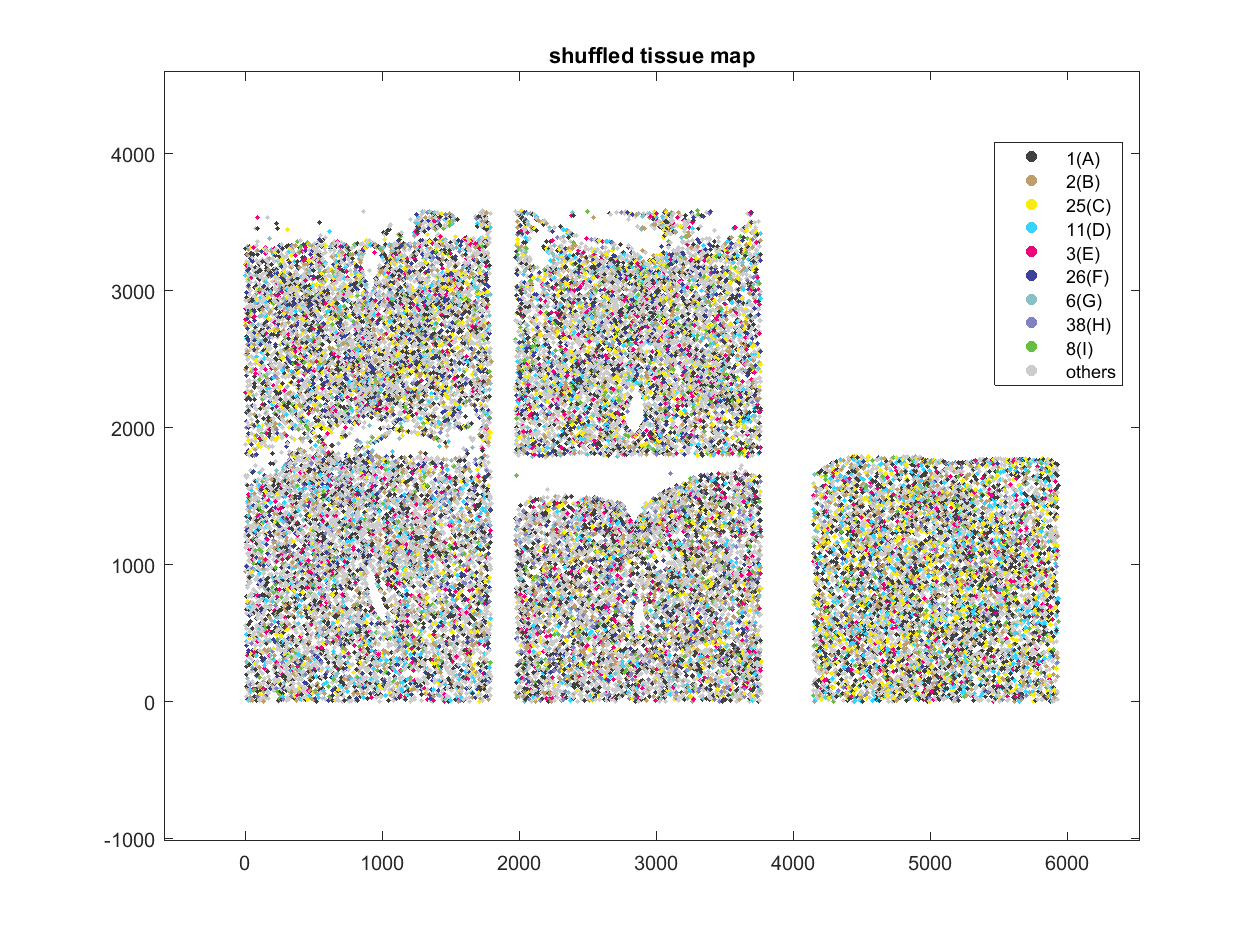

In [10]:
gHLoptions.folderName=outputFolderName;
gHLoptions.isShuffled=true;
gHLoptions.numHLight=9; 
gHLoptions.hLOffset=0; 
plotHLightGraph(G, cNTypes(1:length(cPTypes)), gHLoptions);

## Plotting cell type frequencies, 
Control data and the original data have the same frequency of cell types,

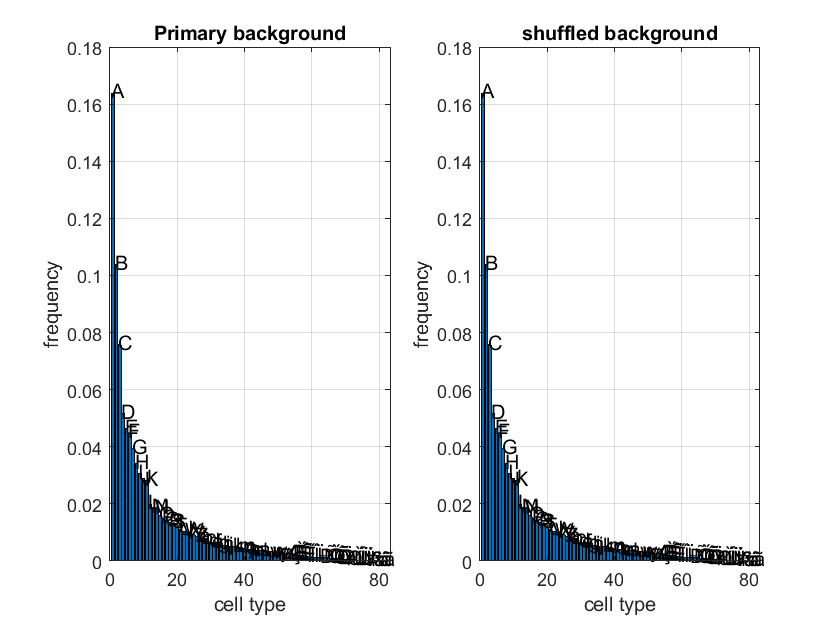

In [11]:
close(gcf);
cPTypesU=unique(cPTypes);
PWMT=sum(cPTypes(:)==(cPTypesU(:)).');
PWMT=PWMT/sum(PWMT);
figure('visible','on');
subplot(1, 2, 1)
bar(cPTypesU, PWMT)
grid on
xlabel('cell type')
ylabel('frequency')
text(cPTypesU-0.5, PWMT+0.001, alphabet(:))
title('Primary background')
PWMTNK=sum(cNTypes(:)==cPTypesU);
PWMTNK=PWMTNK/sum(PWMTNK);
subplot(1, 2, 2)
bar(cPTypesU, PWMTNK)
grid on
xlabel('cell type')
ylabel('frequency')
text(cPTypesU-0.5, PWMT+0.001, alphabet(:))
title('shuffled background')
figname=strcat(outputFolderName,'primShuffleBg.jpeg');
saveas(gcf,figname)

## Generate Shuffled data
Preparing input data and control data with SMORE input standard, along with adding the reverse paths. 

In [12]:
gOptions.hFrac=0;
gOptions.mkvOrder=0;
gOptions.rvp=true;
gOptions.isSectHold=true;
gOptions.isHExclsv=true;
gOptions.numNodes=length(cPTypes);
gOptions.disObvs=options.disObvs;
nodeSectionsGen=nodeSections;
nodeSectionsGenu=unique(nodeSectionsGen);
randiHold=nodeSectionsGenu(randperm(length(nodeSectionsGenu)));
randiHold=randiHold(1:floor(length(nodeSectionsGenu)/4));
nodeSectionsGen(ismember(nodeSectionsGen,randiHold))=1;
gOptions.numGRs=1;
[posSeq, ~, cPTypes0, posWeight]=generateSeqs(pathList,pathWeights,nodeSectionsGen,cPTypes, gOptions);
gOptions.numGRs=1;
[~, ~, cNTypes0, negWeight]=generateSeqs(pathList,pathWeights,nodeSectionsGen,cNTypes, gOptions);
delete(gcp('nocreate'))

## Identify Motifs
Smore is applied on the input data, in the case of length-2 motifs, we can compute pvalues for all possible cases and plot the heatmap. In this example heatmap, brown cases are overexpressed,blue are underexpressed, and white is not significant.

Smore started with shuffling method "shuffle" and FixedTypes "0" 

Counting Seeds         (Motif #1)... Elapsed Time 3.703 seconds 
Evaluate Initial Seeds (Motif #1)... 

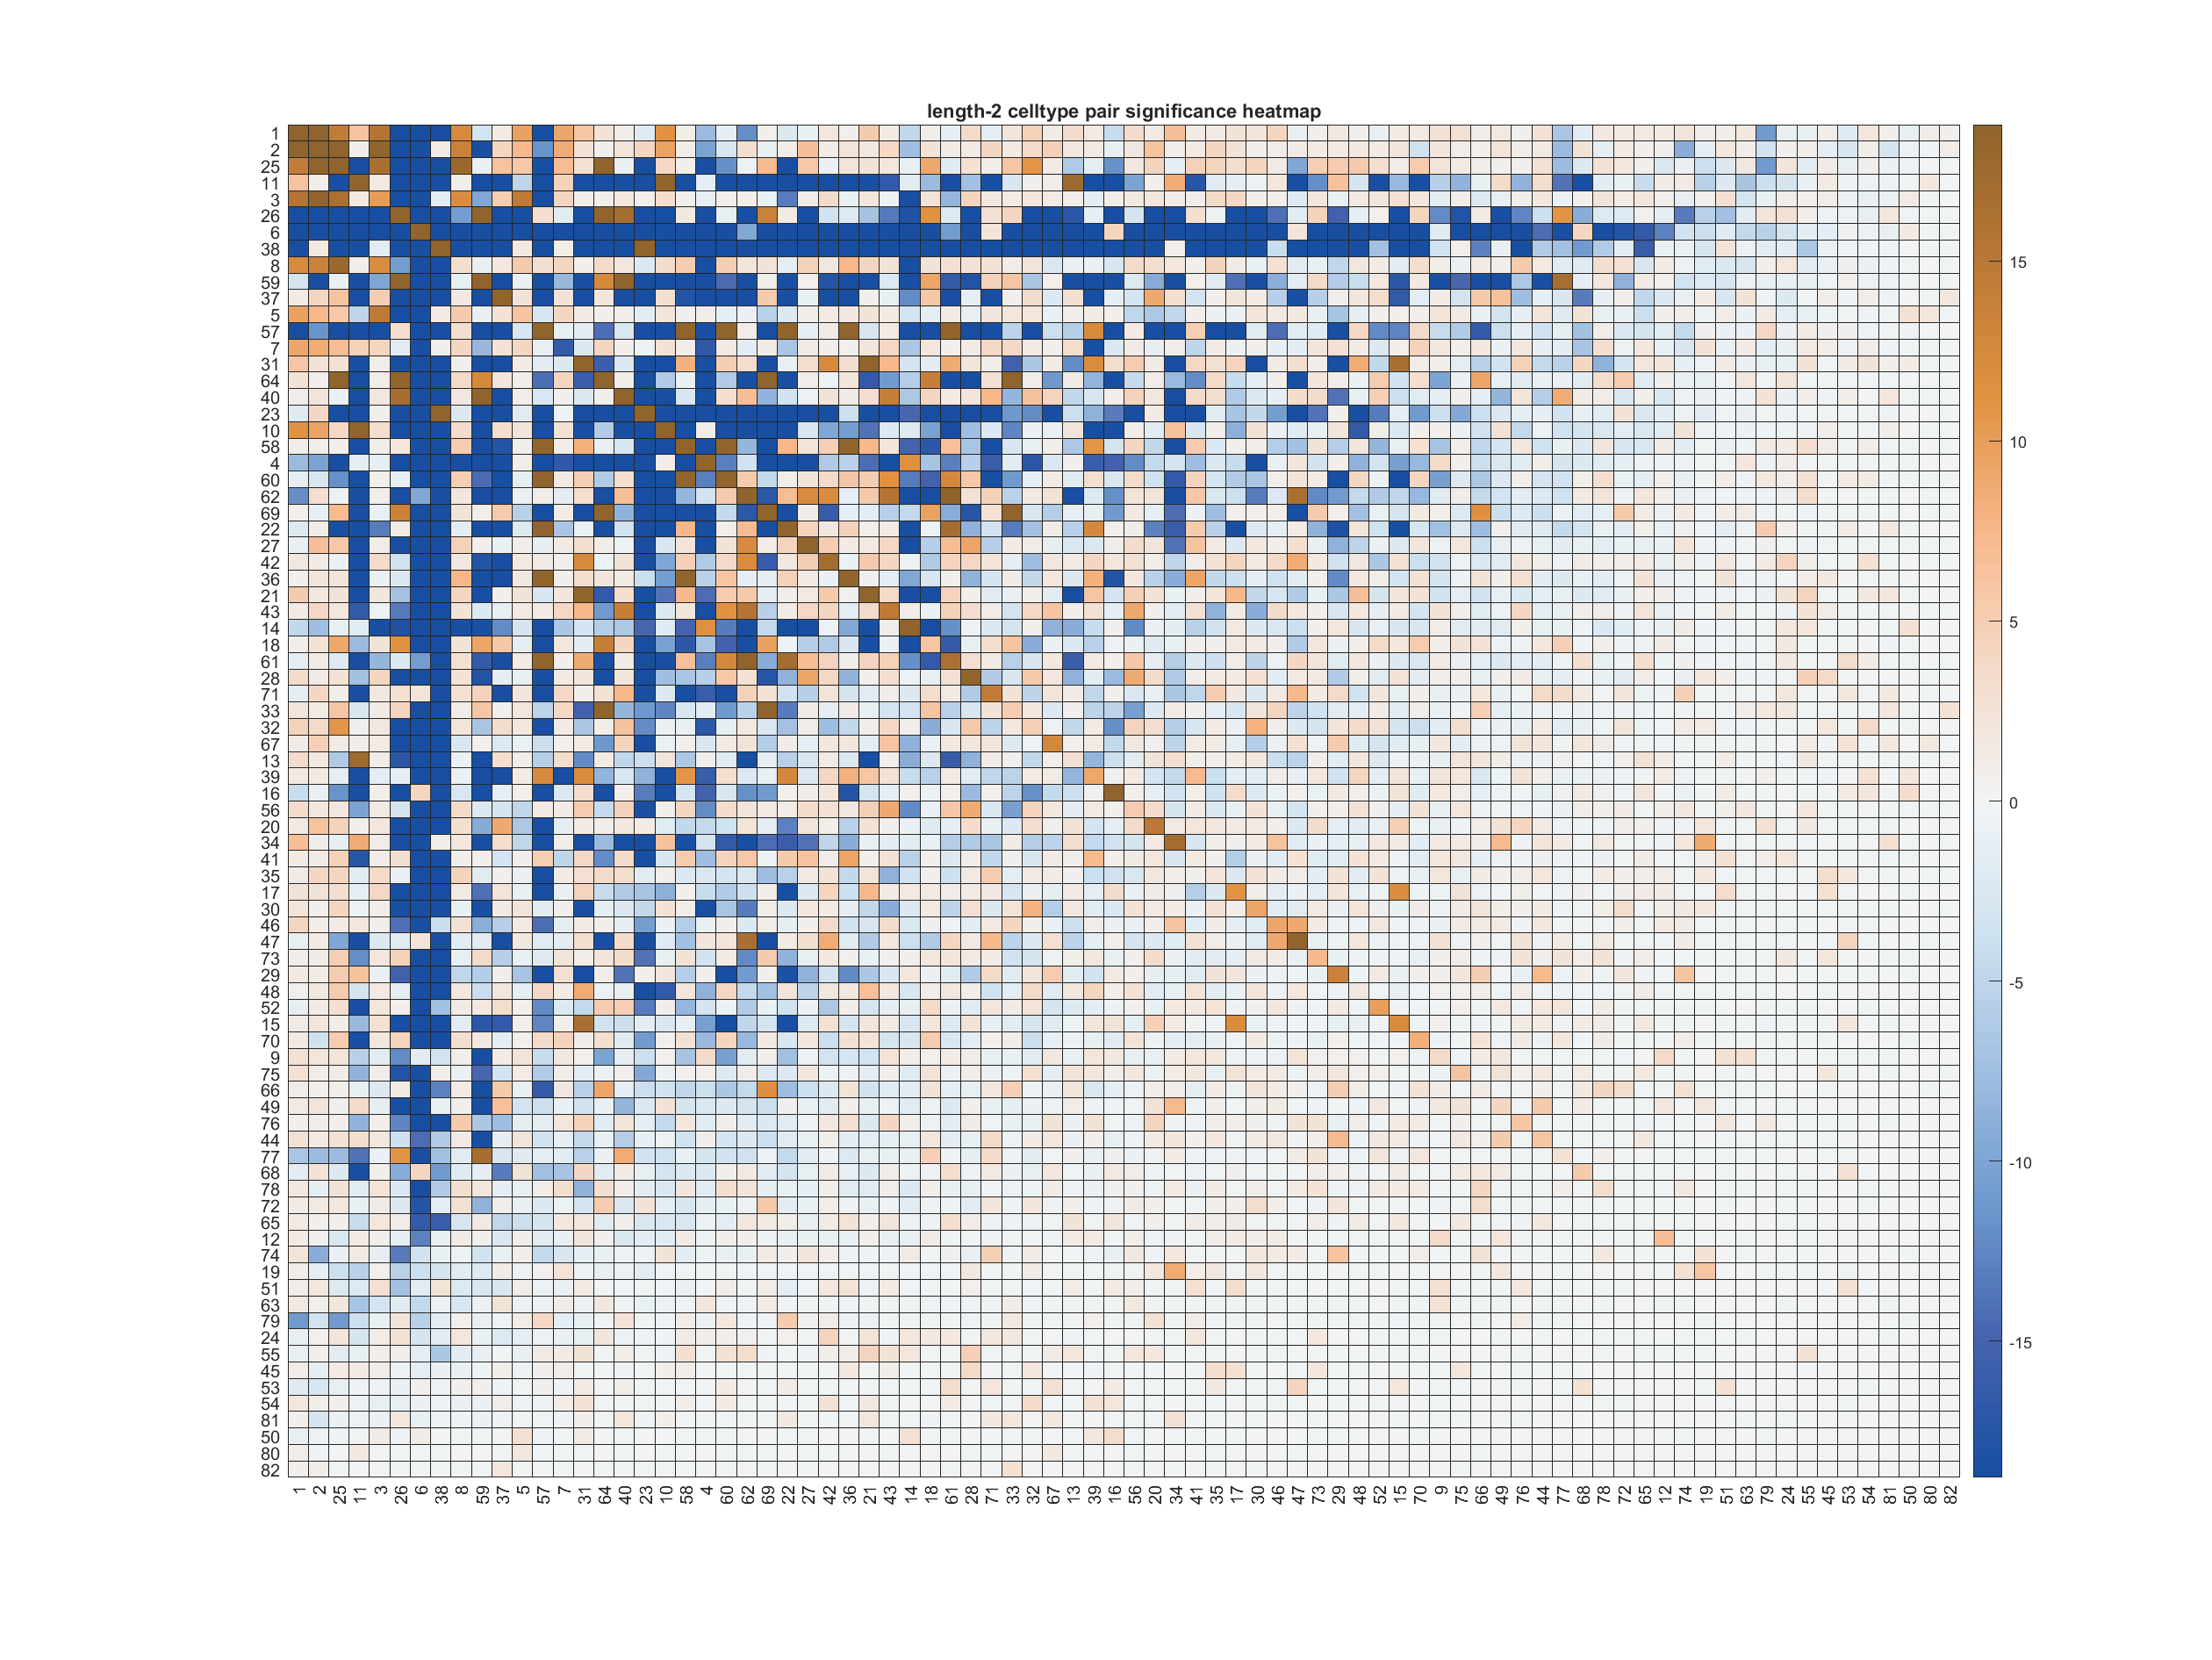

Motif Analysis Finished Becasue 30 Motifs Were Found


In [13]:
close(gcf);
statOut=sprintf('Smore started with shuffling method "%s" and FixedTypes "%s" \n', ...
    options.shuffleMode, num2str(options.fixedTypes));
fprintf(statOut);
rng(1761); % reproducibility
timerValue=tic;
[extMotif,textOut, ~, background]=mtSmore(cPTypes=cPTypes0, cNTypes=cNTypes0,cPHTypes=cPTypes,cNHTypes=cNTypes(1:length(cPTypes)),...
    pSeq=posSeq, posWeight=posWeight, negWeight=negWeight, rvp=gOptions.rvp, mkvOrder=gOptions.mkvOrder, wMin=W, wMax=W, ...
    nmotifs=options.nMotifs,alphabet=alphabet,fixedTypes=fixedTypes,shConfig=shConfig,shuffleMode=shuffleMode,...
    nRefIter=options.nRefineIter, gTrainNum=options.nTrain, isEnrich=options.isEnrich, scIterMax=options.nScore,...
    NREF=options.nRefine, NEVAL=options.nEval,cellTypesStr=cellTypesOne);
elapsedTime=toc(timerValue);
numExtMotifs=length(extMotif);


## Resolve motif nodes
Motif nodes will be used to generate motif highlights on the input tissue graph and performing differential gene expressin analysis. 

In [14]:
if samPro<1
    enOptions.pdv=ones(1,pathLength);
    seedsAll=arrayfun(@(i) extMotif{i}.seedsToPWM, 1:length(extMotif), 'uniformOutput', false);
    seedsAll=vertcat(seedsAll{:});

    enOptions.pdv=ones(1,pathLength);
    enOptions.seedsAll=seedsAll;
    enOptions.ctypes=cPTypes;

    if W>2
        [pathList, ~, nodeSections, pathWeights]=URPENH(gStruct,enOptions);
        
    else
        pathList=G.Edges.EndNodes;
        nodeSections=gStruct.labels(pathList(:, 1), 2);
        pathWeights=G.Edges.Weight;
        pathList=num2cell(pathList, 2);

    end
    nodeSectionsGen=nodeSections;
    nodeSectionsGen(ismember(nodeSectionsGen,randiHold))=1;
    posSeq=generateSeqs(pathList,pathWeights,nodeSectionsGen,cPTypes, gOptions);
end

seqData.pSeq=posSeq;
seqData.nSeq=[];
seqData.pHSeq=[];
seqData.nHSeq=[];
seqData.back=background;
seqData.cPTypes=cPTypes;
seqData.cNTypes=[];
seqData.cPHTypes=[];
seqData.cNHTypes=[];
seqData.rvp=gOptions.rvp;
erzOptions.isErzNegative=false;
erzOptions.fixedTypes=fixedTypes;
erzOptions.shuffleMode=shuffleMode;
erzOptions.nearNeighs=shConfig.nearNeighs;
erzOptions.isErzFixNodes=false;
erzOptions.isOLess=false;
erzOptions.trNumShuffle=1;
erzOptions.cPTypesInit=cPTypes;
erzOptions.cNTypesInit=cNTypes;
erzOptions.isErzHOut=false;
erzOptions.isOKSingleNC=true;
erzOptions.isNotNMer=true;
erzOptions.isEraseNodes=true;
erzOptions.rvp=gOptions.rvp;
erzOptions.mkvOrder=gOptions.mkvOrder;
ppHMNodesCell=cell(numExtMotifs, 1);

for iEx=1:length(extMotif)
    outMotif=extMotif{iEx};
    outMotif.PWMSE=log2(eps+outMotif.PWM)-log2(background{1});
    [~, sitesErased]=eraseMotif(outMotif,  seqData, erzOptions);
    outMotif.pNodes=sitesErased.pNodes;
    outMotif.nNodes=sitesErased.nNodes;
    outMotif.pHNodes=sitesErased.pHNodes;
    outMotif.nHNodes=sitesErased.nHNodes;
    outMotif.nsites=sum(sitesErased.pSeq)+sum(sitesErased.pHSeq);
    extMotif{iEx}=outMotif;
    ppHMNodesCell{iEx}=[outMotif.pNodes;outMotif.pHNodes];
end
bkg.PWM0=background{1};
bkg.mkvOrder=gOptions.mkvOrder;

% data saved to be be used for later analysis
save(mNodefilename,'ppHMNodesCell', 'extMotif', 'options');

%%

ProfDateNum=datetime("now");
numFixedTypes=sum(fixedTypes>0);
statOut=sprintf('Shuffling method "%s" and numFixedTypes %d finished at : %s\n', shuffleMode, numFixedTypes, ProfDateNum);
fprintf(statOut)


Shuffling method "shuffle" and numFixedTypes 0 finished at : 28-Jan-2025 16:20:02


## Sequence logo for the output motifs
Sequence logos are saved in the output folder.

In [15]:
statOut=sprintf('logos and motif highlights are saved in "%s" \n', string(outputFolderName));
fprintf(statOut)
cTypeChars=alphabet;
for iexMotif=1:numExtMotifs
    exMotifi=extMotif{iexMotif};
    exMotifi.background=background;
    [~, hfig] = seqlogoGen(exMotifi, alphabet);
    [~, exMotifi.cSeed]=max(exMotifi.PWM);
    cSeedStr = strjoin(string(exMotifi.cSeed), '_');
    figname=strcat(outputFolderName, 'mLogo',num2str(iexMotif), '_',cSeedStr, '.jpeg');
    saveas(hfig,figname)
    close(hfig);
end

logos and motif highlights are saved in "D:/nucla/P1/mcodes/SMORE/output/hypo2D/W2_28-Jan-2025/" 


##  PValues
Plot for the pvalues of the output motifs.

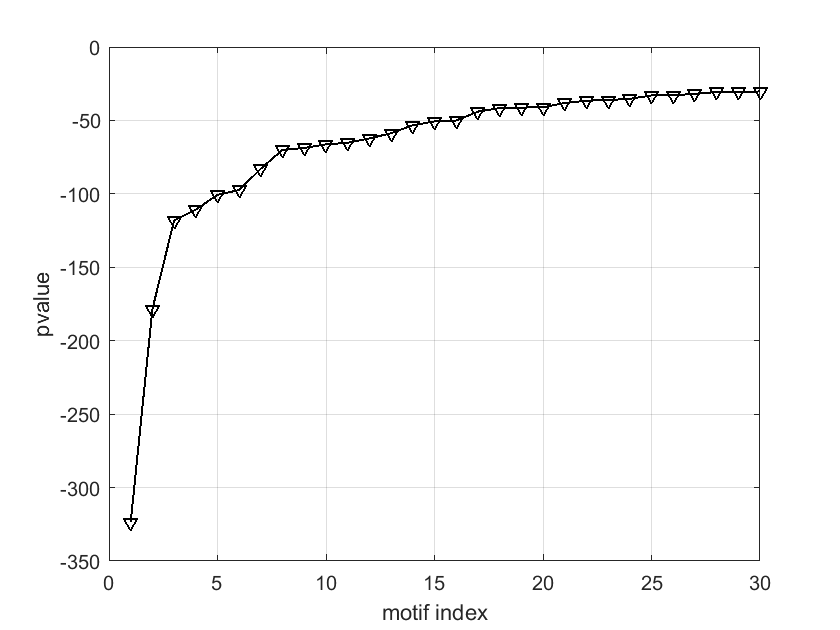

In [16]:
close(gcf);
pvalueVec=zeros(numExtMotifs, 1);
scoreThrVec=zeros(numExtMotifs, 1);
for iexMotif=1:numExtMotifs
    exMotifi=extMotif{iexMotif};
    pvalueVec(iexMotif)=exMotifi.testPvalue;
    scoreThrVec(iexMotif)=exMotifi.scoreThr;
end

figure('visible','on');
plot(pvalueVec, '-kv', 'LineWidth',1)
grid on
xlabel('motif index')
ylabel('pvalue')
figname=strcat(outputFolderName,'pvalueW', num2str(W), '.jpeg');
saveas(gcf,figname)

A readme.txt file is created and saved in the output folder containg some  of the major settings and the list of the cell types along with their sequence logo chars. 

In [17]:
rmeConfig=cgOptions;
rmeConfig.cTypeChars=cTypeChars;
rmeConfig.cellTypes=(1:length(cellTypesOne));
rmeConfig.cellTypesOne=cellTypesOne;
rmeConfig.W=W;
rmeConfig.randiHold=randiHold;
if  strcmpi(shuffleMode, 'noisy')
    rmeConfig.randiHoldR=randiHoldR;
else
    rmeConfig.randiHoldR=randiHold;
end
readmeFileName=strcat(outputFolderName,'readme.txt');
rmeConfig.isEraseFixed=false;
rmeConfig.sampleSpecs=sampleSpecs;
rmeConfig.statURPENG=statURPENG;
writeReadme(readmeFileName, fixedTypes, rmeConfig);

## Highlight motif nodes
Motifs are highlighted separatly and saved in the output folder

In [18]:
hlConfig.is3D=false;
hlConfig.W=W;
hlConfig.cTypeChars=cTypeChars;
hlConfig.fignamExtnd='.jpeg';
highLMNodes(G, ppHMNodesCell,outputFolderName, hlConfig)
if haveZ
    hlConfig.is3D=true;
    highLMNodes(G, ppHMNodesCell,outputFolderName, hlConfig)
end

## Highlight all motifs 
All output motifs are highlighted in a single tissue graph.

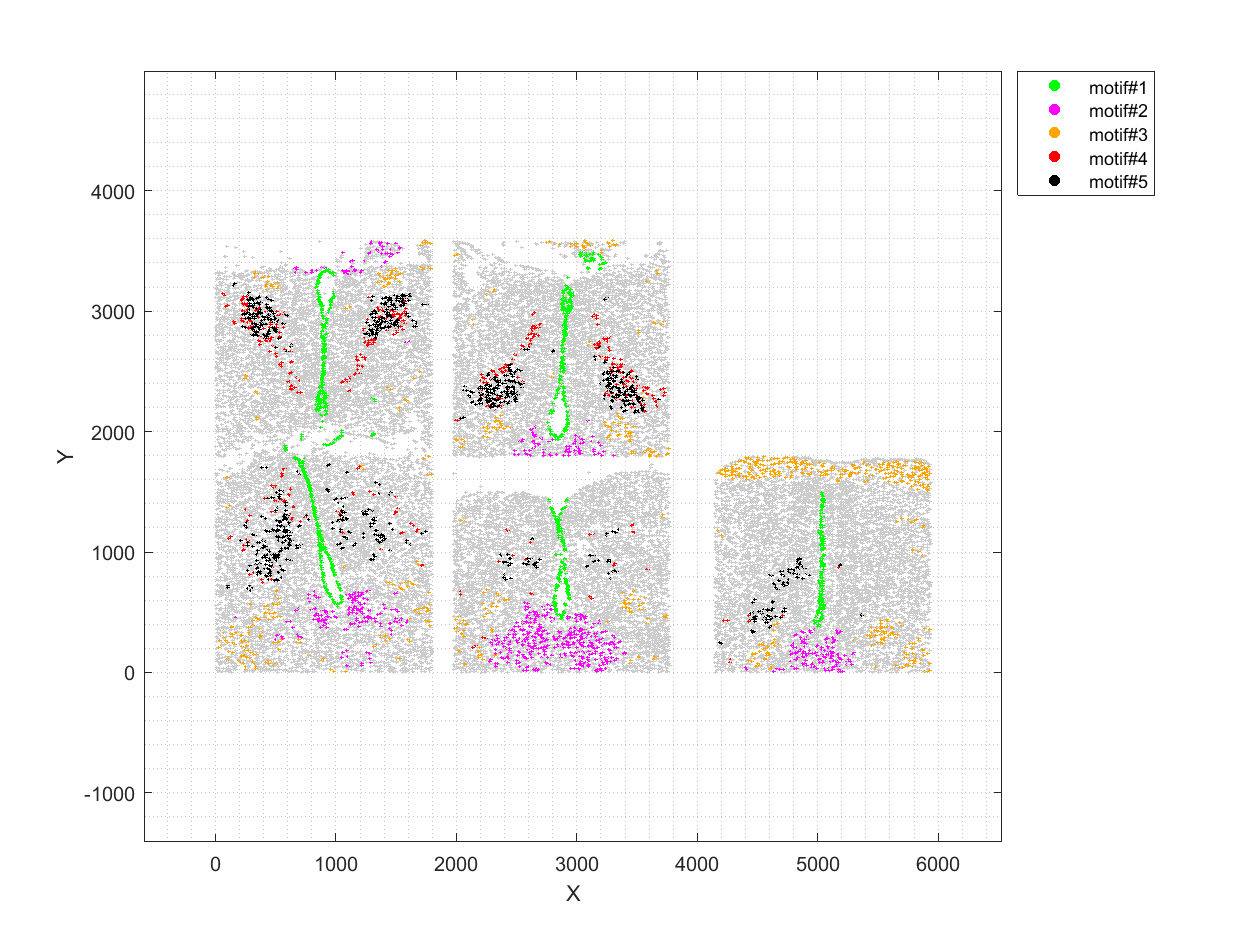

In [19]:
close(gcf);
hlConfig.is3D=false;
hlConfig.numHLights=5; % number of highlighted motifs
hlConfig.ndesPlotIDx=[];
hlConfig.offsetHL=0; % highlight offset, similar to hLOffset

% highlights fisrt hlConfig.numHLights of motifs starting from
% hlConfig.offsetHL+1
highALMNodes(G, ppHMNodesCell,outputFolderName, hlConfig)

highlight next 5 motifs, 

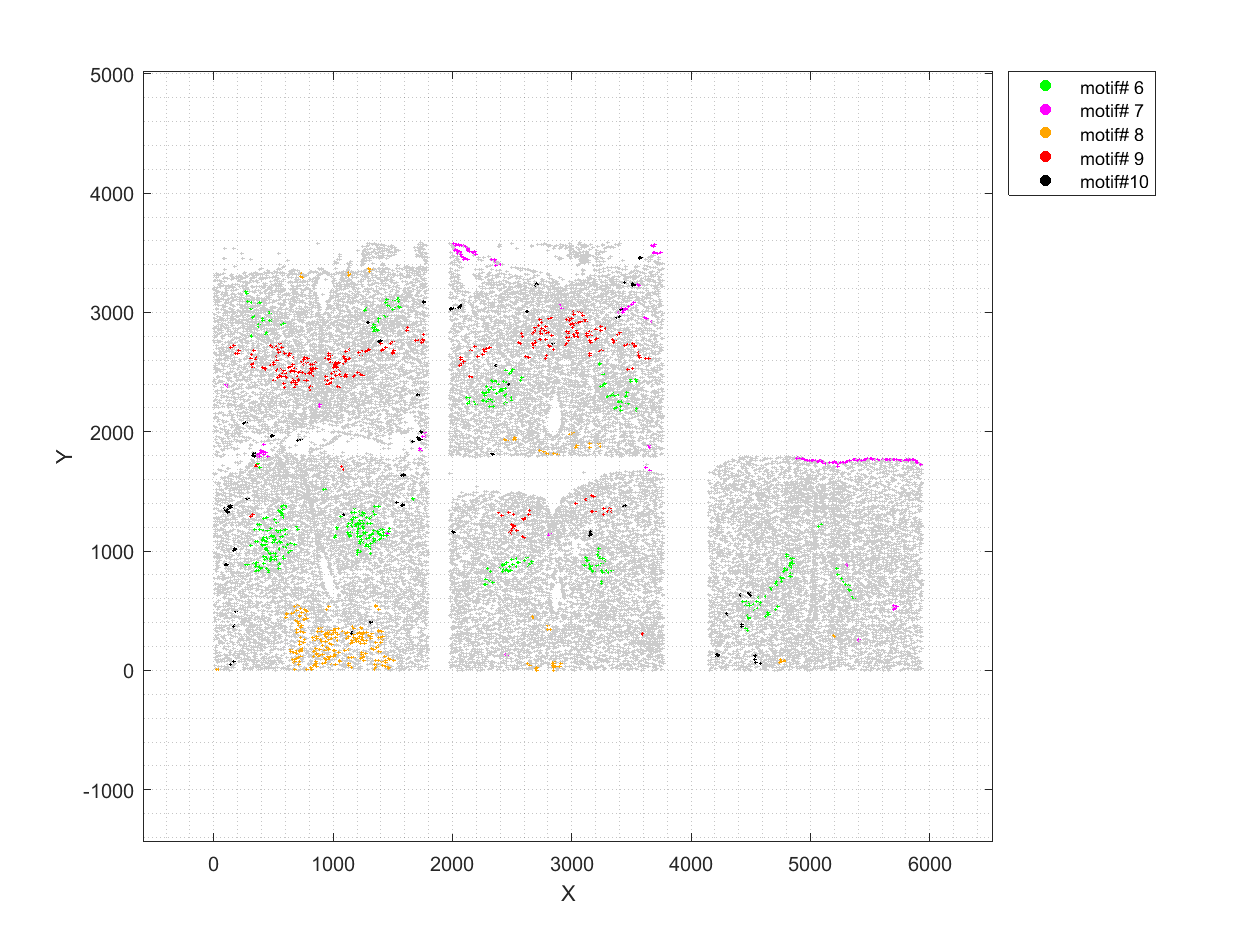

In [20]:
close(gcf);
hlConfig.offsetHL=5;
highALMNodes(G, ppHMNodesCell,outputFolderName, hlConfig)

if haveZ
    hlConfig.is3D=true;
    highALMNodes(G, ppHMNodesCell,outputFolderName, hlConfig)
end

## Performing differrential gene expresssion analysis
read cellTable,

In [21]:
if options.doGEA
    if options.iSPGEx
        geNames=importdata(dataFolder.gAnotFilename);
        nGenes=length(geNames);
        gexData = h5read(dataFolder.gexFilename, '/X/data');
        indCols = h5read(dataFolder.gexFilename, '/X/indices');
        indRPtr = h5read(dataFolder.gexFilename, '/X/indptr');        
        mCells=length(indRPtr)-1;

        indRows=repelem((1:mCells).', indRPtr(2:end)-indRPtr(1:end-1));
        gExpression=sparse(indRows, indCols-min(indCols)+1, gexData,mCells, nGenes);
        gExpression=gExpression(cidNOut, :);
        if strcmpi(geNames{1}, 'fov')
            geNames=geNames(3:end);
            gExpression=gExpression(:, 3:end);
        end
    else
        gExpression=readtable(dataFolder.gexFilename);
        geNames=gExpression.Properties.VariableNames;
        if strcmpi(geNames{1}, 'CID')
            geNames=geNames(2:end);
            gExpression=gExpression(:, 2:end);
        end

        gExpression=gExpression(cidNOut, :);
        gExpression=table2array(gExpression);

    end
end


perform gene expression analysis,

In [22]:
if abs(options.gePvalMin)>1
    pvalAllHMapMin=exp(-abs(options.gePvalMin));
else
    pvalAllHMapMin=options.gePvalMin;
end

if options.doGEA

    statOut='Starting gene expression analysis \n';
    fprintf(statOut)
    geaSpecs.isPlotPDF=false;
    geaSpecs.isAddNoise=true;
    geaSpecs.pvalAllHMapMin=pvalAllHMapMin;
    geaSpecs.outputFolderName=strcat(outputFolderName, 'genEx/');
    geaSpecs.isTwoSided=true;
    geaSpecs.isRndTest=options.geRandTest;
    geaSpecs.W=W;
    geaSpecs.geneAnnotes=geNames;
    geaSpecs.cellType=cPTypes(:);
    geaSpecs.isGEByTissue=options.isGEByTissue;
    geaSpecs.SID=G.Nodes.label(:, 2);
    geaSpecs.alphabet=alphabet;
    geaSpecs.motifVsAll=false;
    if ~exist(geaSpecs.outputFolderName, 'dir')
        mkdir(geaSpecs.outputFolderName)
    end
    gexStart=tic;
    gExResults=genExSPAnalysis(gExpression,ppHMNodesCell, geaSpecs);
    gextiming=toc(gexStart);
    save(mNodefilename,'ppHMNodesCell', 'extMotif', 'options', 'gExResults');

end

Starting gene expression analysis 
Evaluating gene expression for motif number:  1
Evaluating gene expression for motif number:  2
Evaluating gene expression for motif number:  3
Evaluating gene expression for motif number:  4
Evaluating gene expression for motif number:  5
Evaluating gene expression for motif number:  6
Evaluating gene expression for motif number:  7
Evaluating gene expression for motif number:  8
Evaluating gene expression for motif number:  9
Evaluating gene expression for motif number:  10
Evaluating gene expression for motif number:  11
Evaluating gene expression for motif number:  12
Evaluating gene expression for motif number:  13
Evaluating gene expression for motif number:  14
Evaluating gene expression for motif number:  15
Evaluating gene expression for motif number:  16
Evaluating gene expression for motif number:  17
Evaluating gene expression for motif number:  18
Evaluating gene expression for motif number:  19
Evaluating gene expression for motif number

## Plot gene expression analysis results

The address format on the y-axis of heatmaps is motif_number-motif_position-cell_type-tissue_ID. In case options.isGEByTissue is set to false, all tissue IDs are equal to one.Clustergram is obtained with pvalues signed by delta median values. 

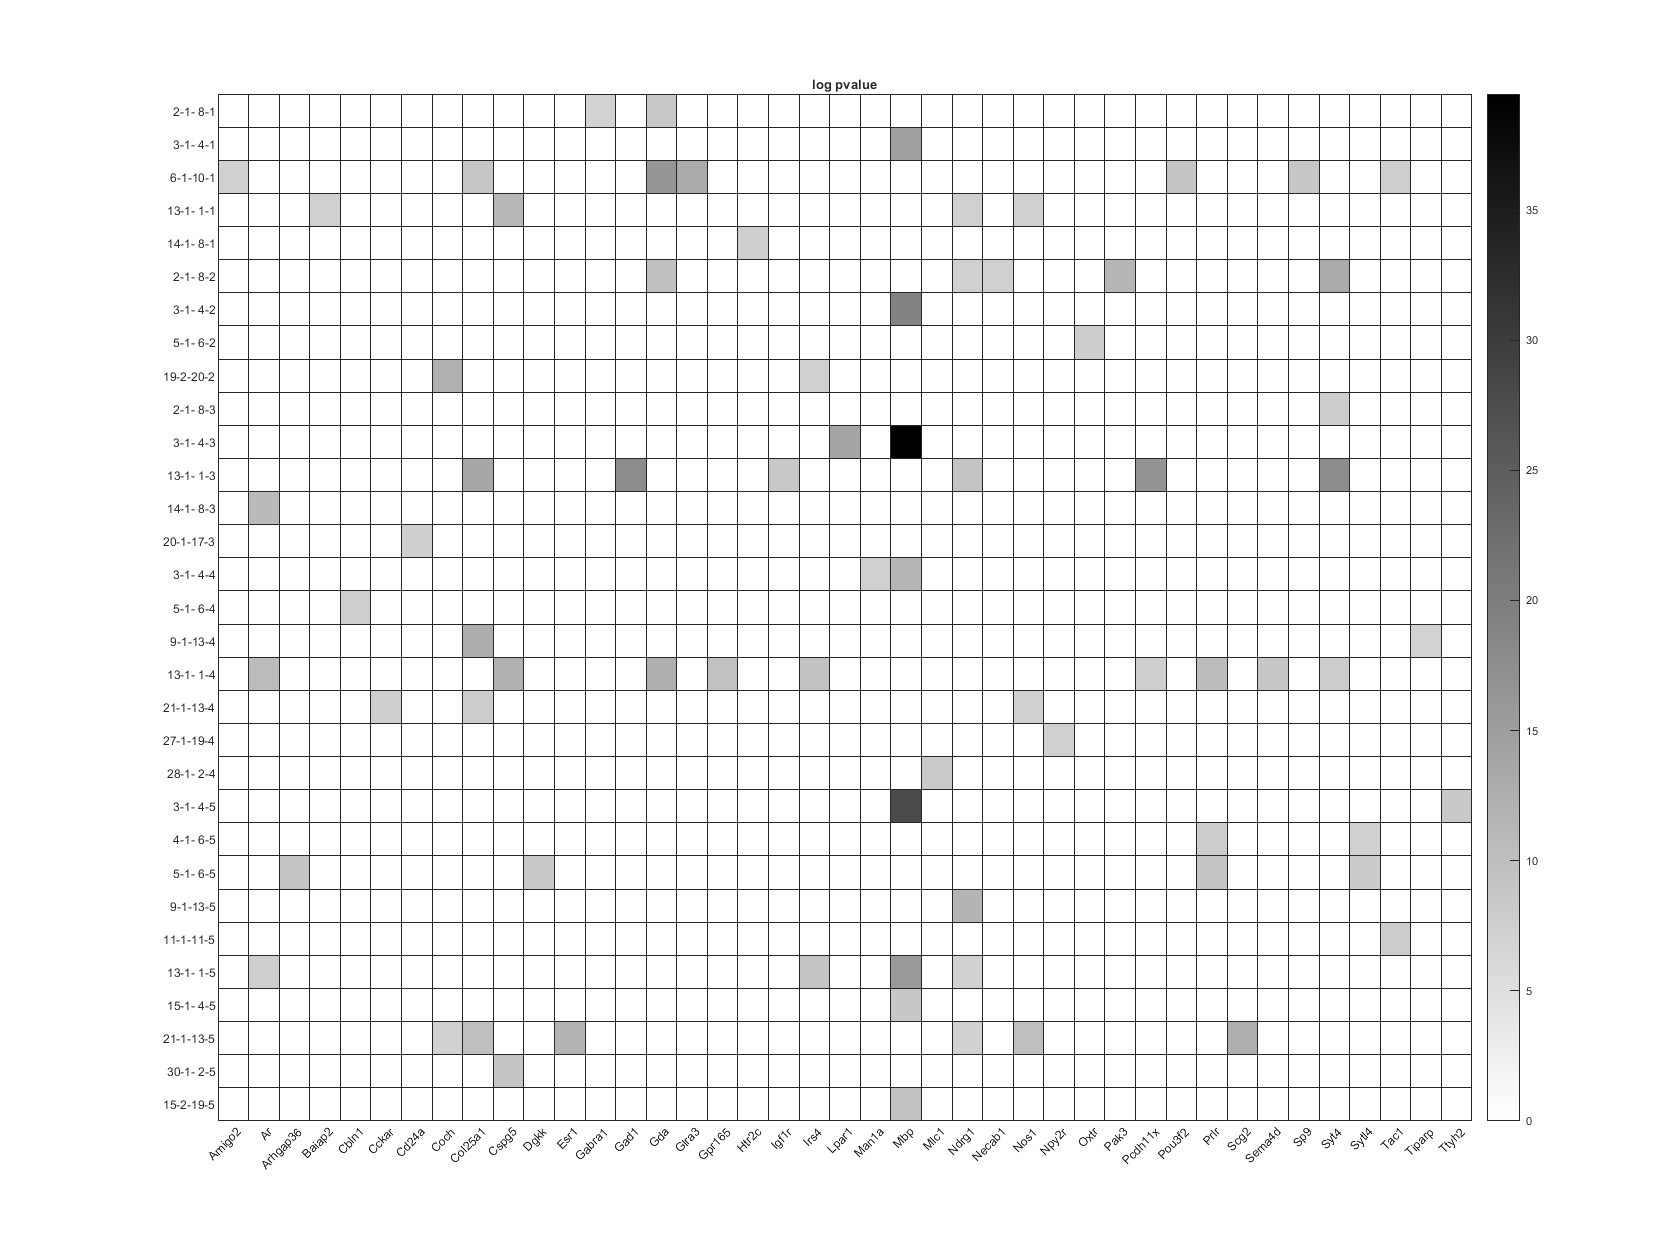

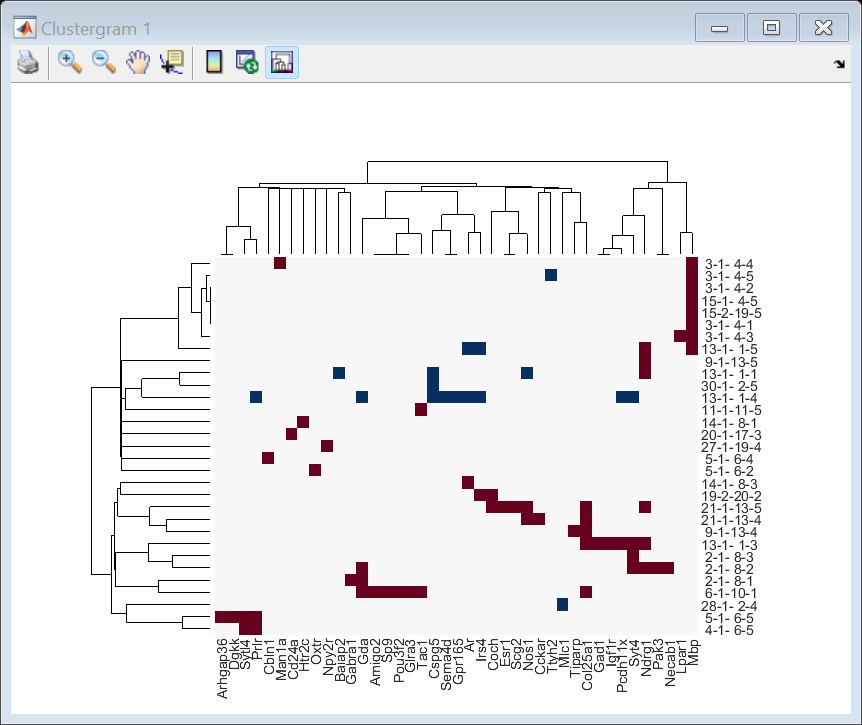

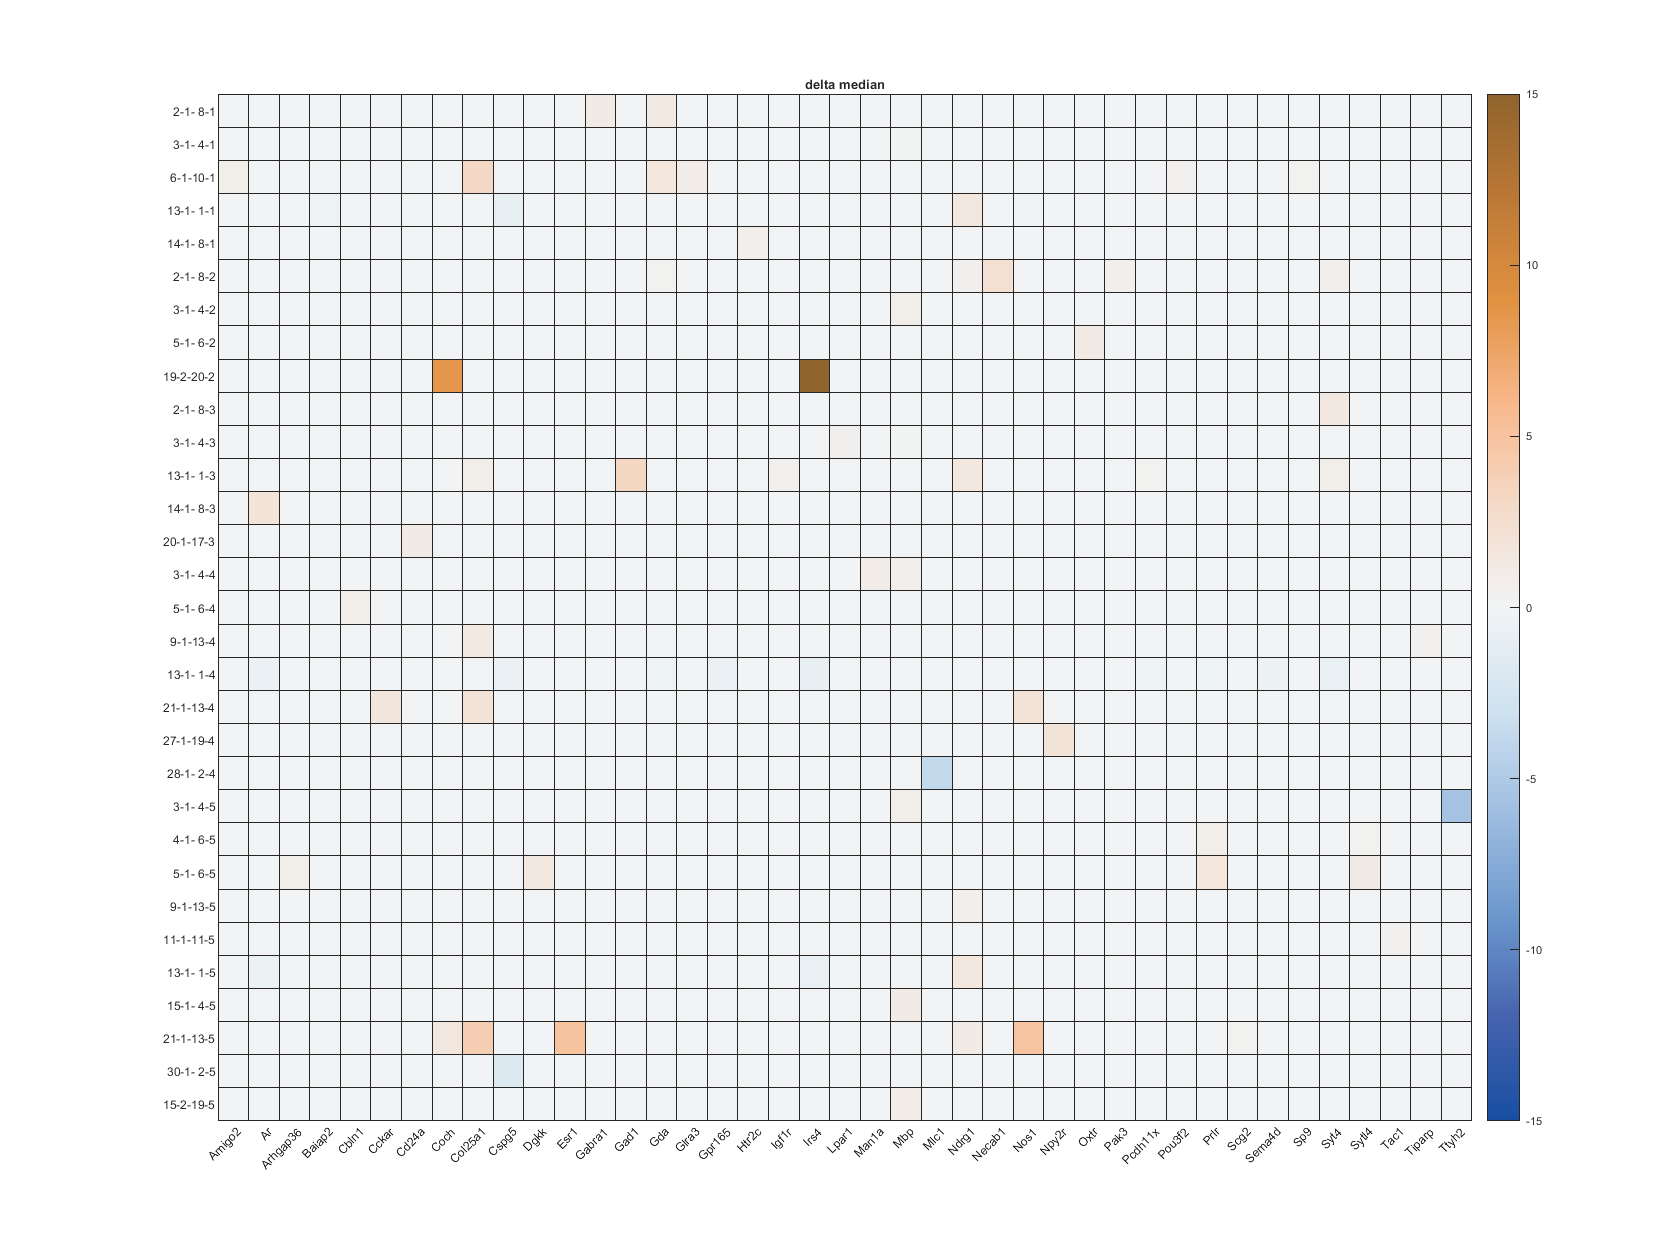

In [23]:
close(gcf);
if options.doGEA  
    geaSpecs.pvalHMapMin=pvalAllHMapMin;
    geaSpecs.dMedHMapMin=0.2;    
    gExHPlot(gExResults, geaSpecs);
end

## Highlight significant genes inside tissues
The highlighted results are saved in output/gOntissue/[gene name] folder. First  5 cases are plotted here. 

In [24]:
gnS3=readtable(strcat(geaSpecs.outputFolderName, 'geaTable.csv'));
gnS3=gnS3(abs(gnS3.deltaMedian)>geaSpecs.dMedHMapMin, :); 
casePlotID=(1:5);

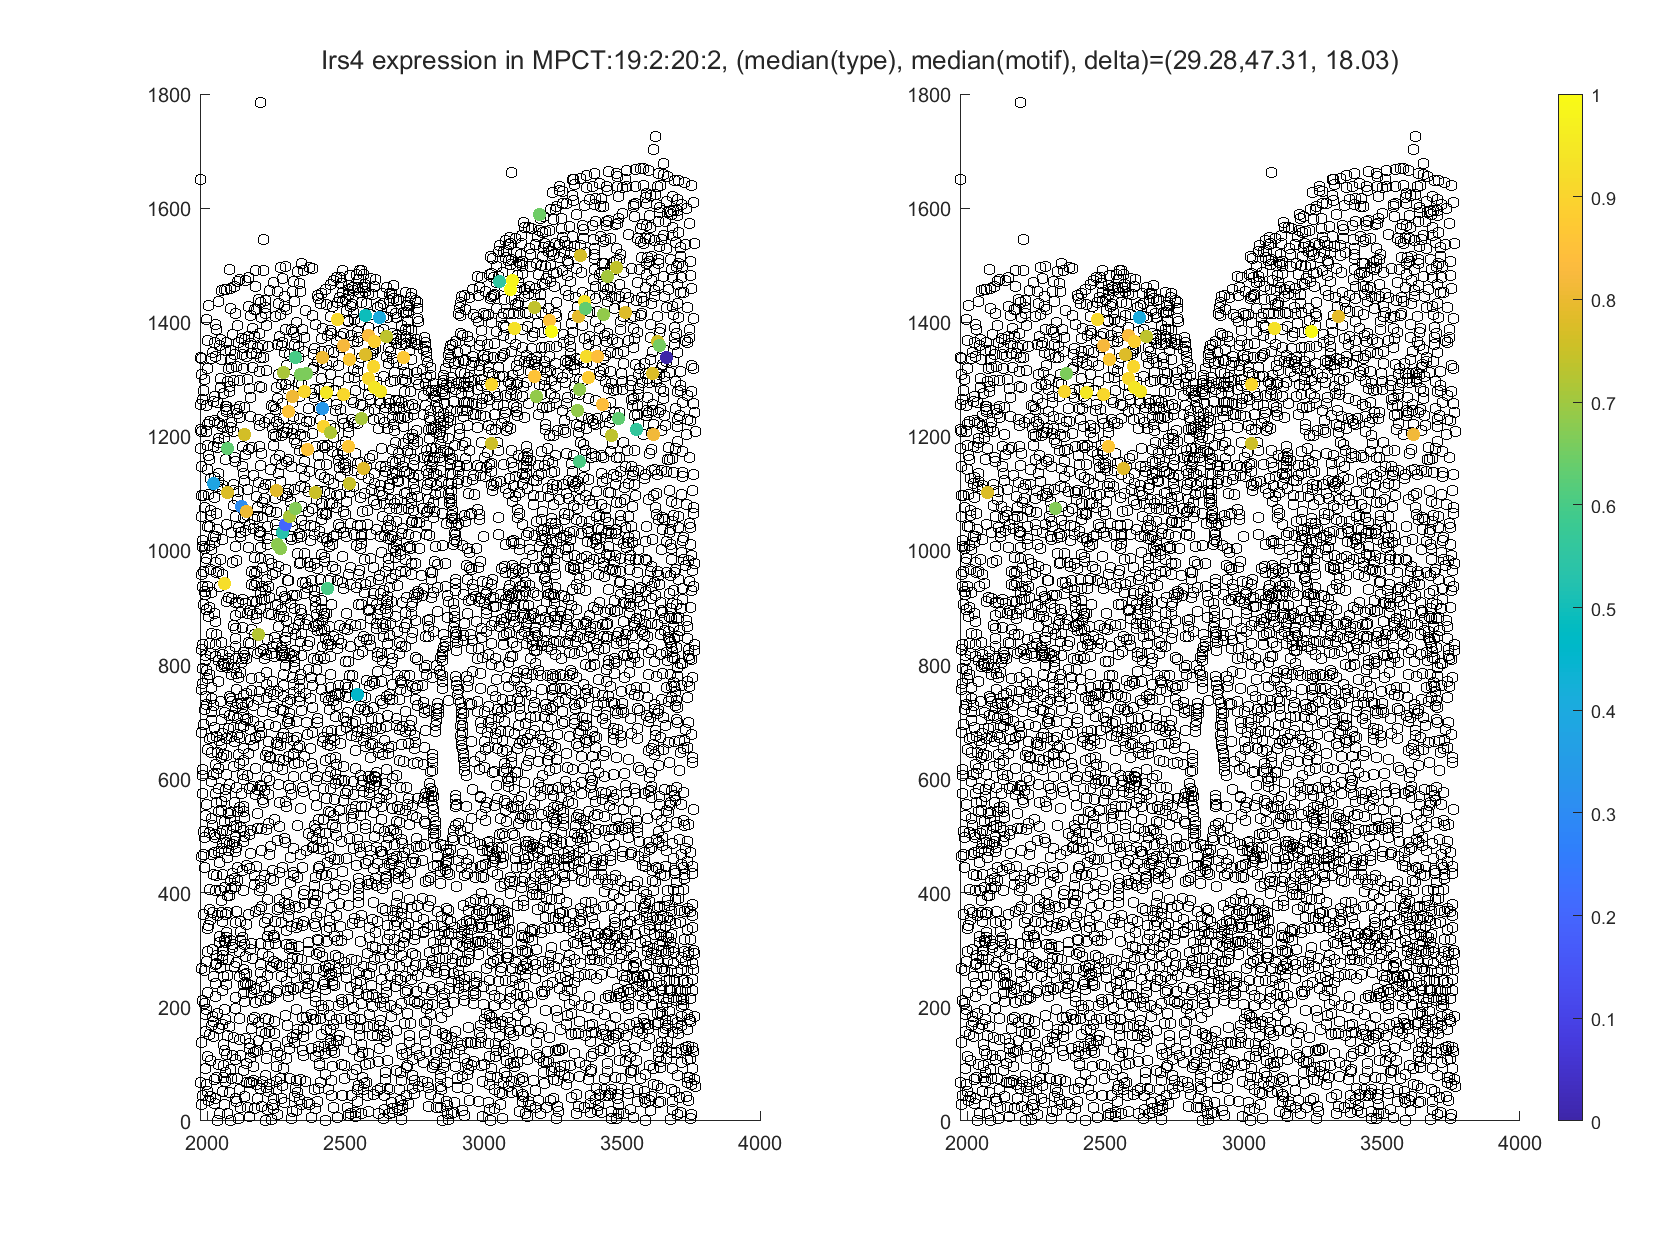

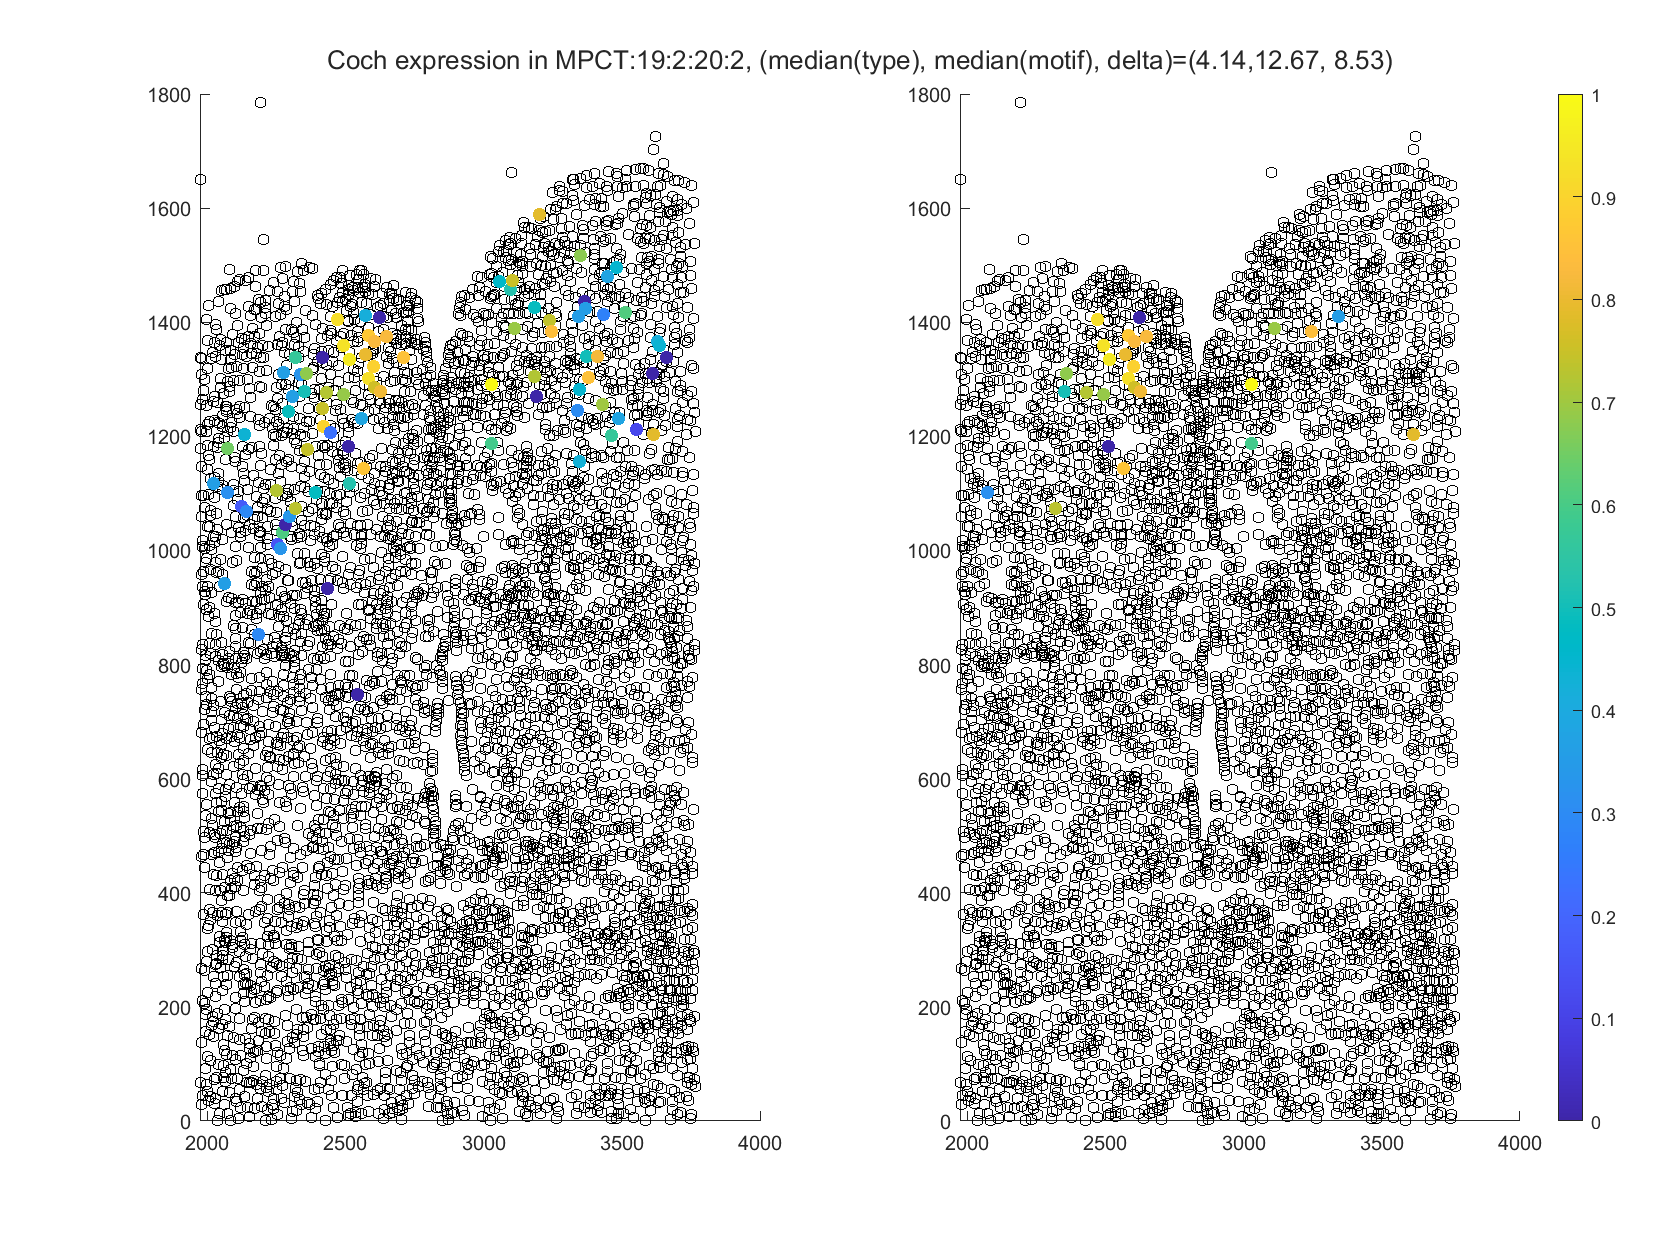

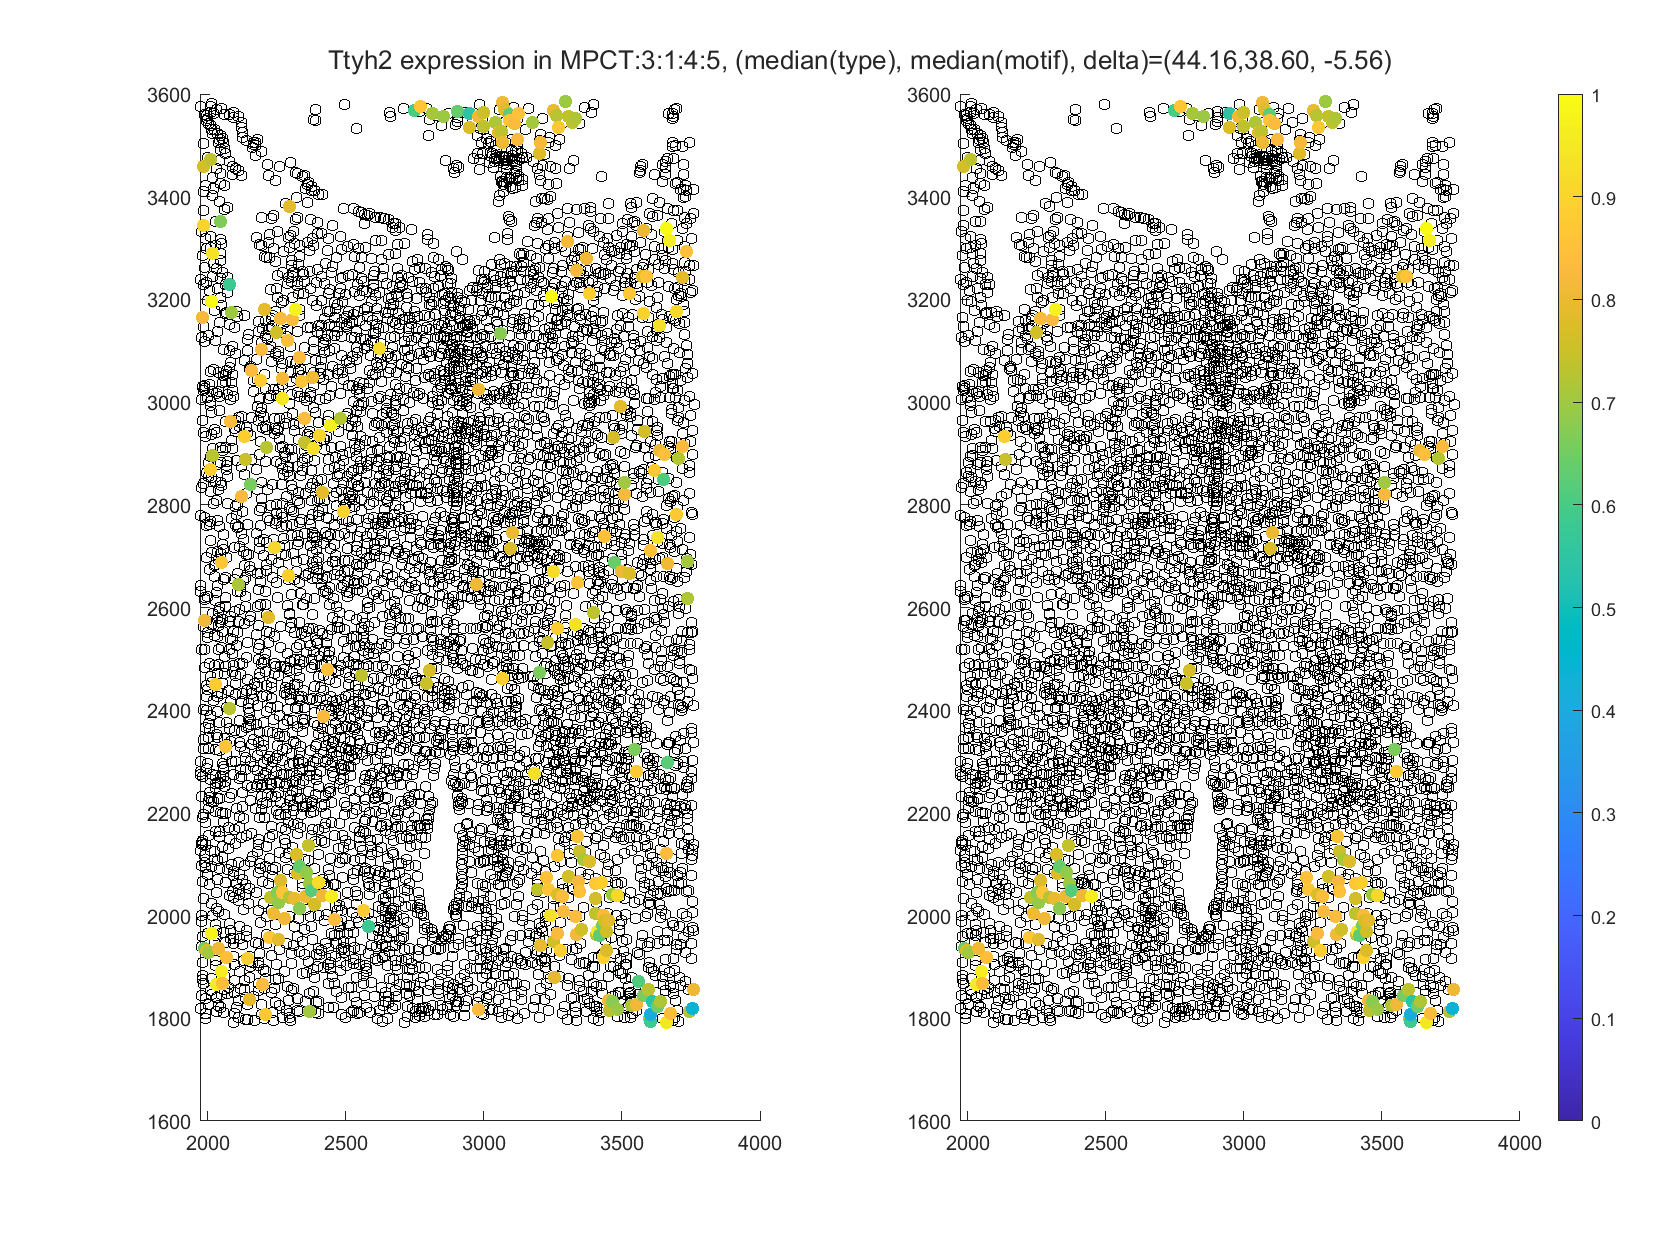

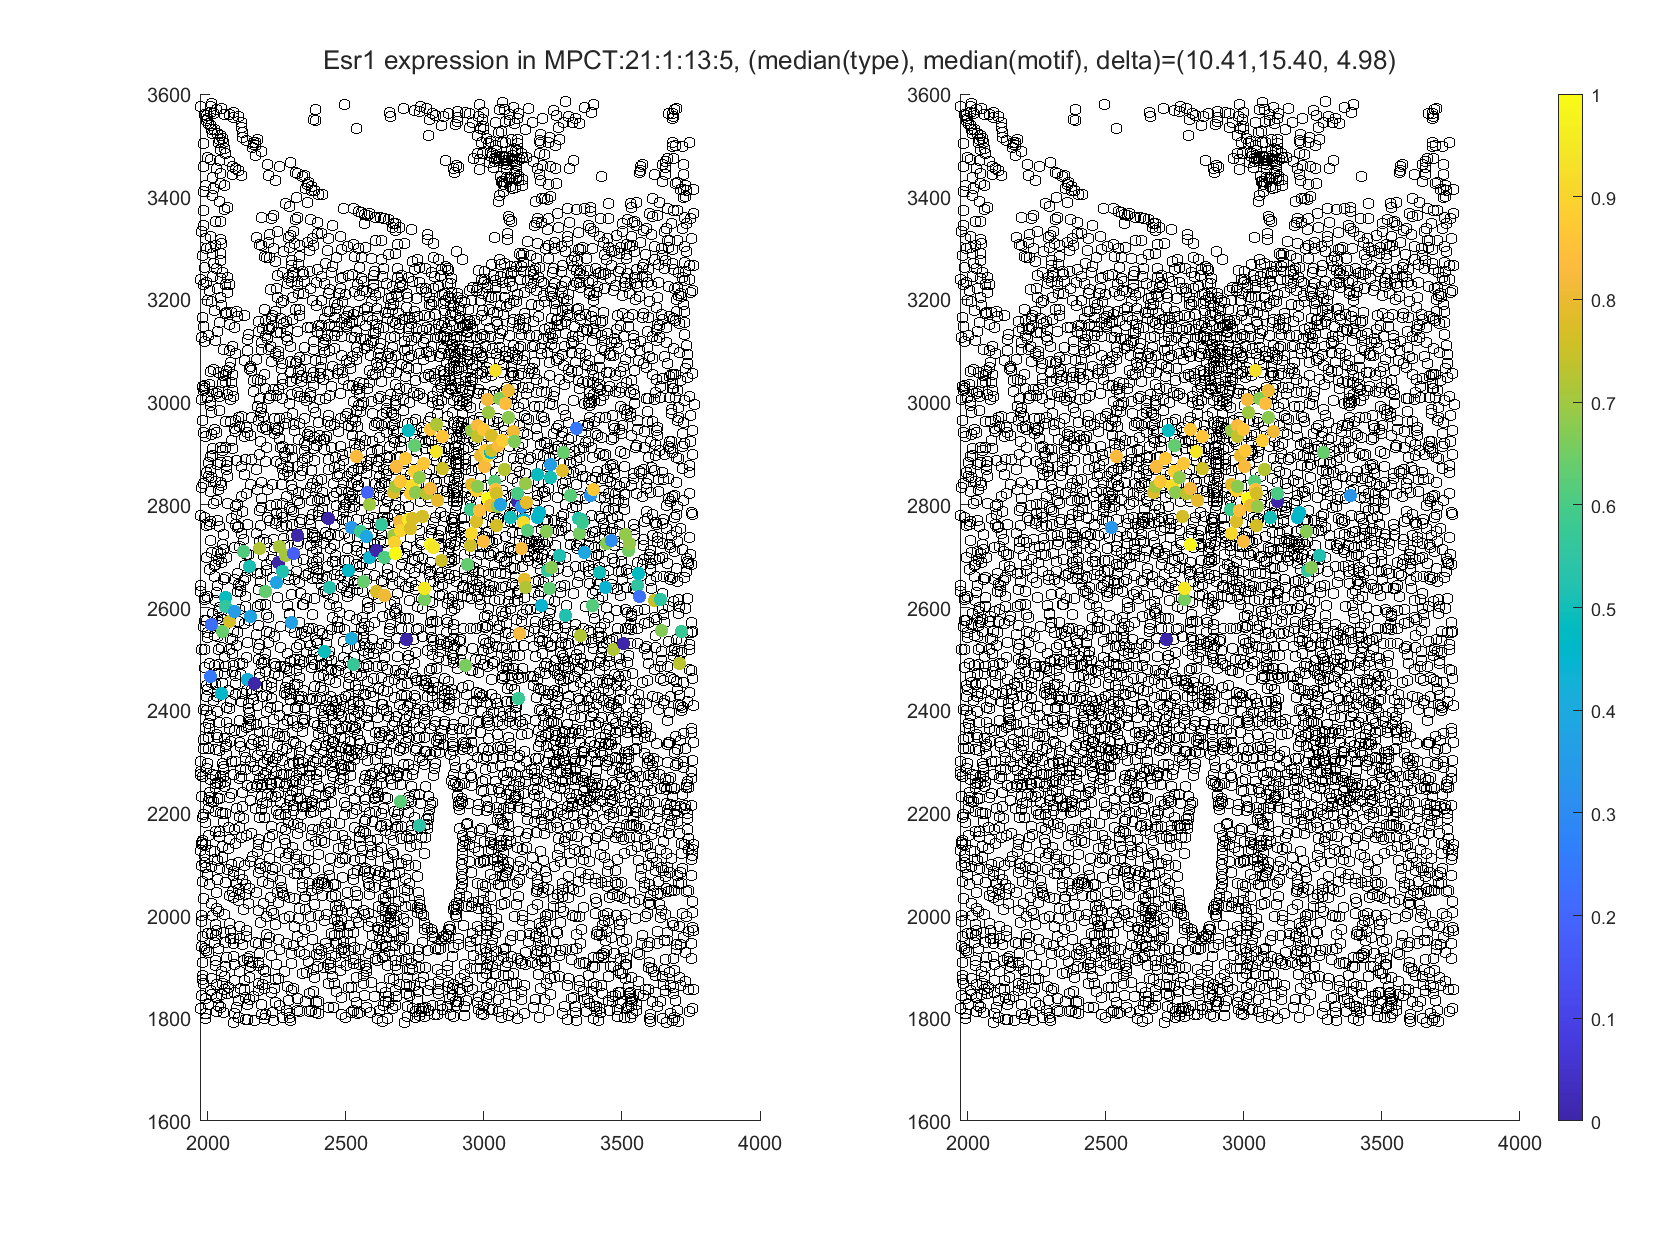

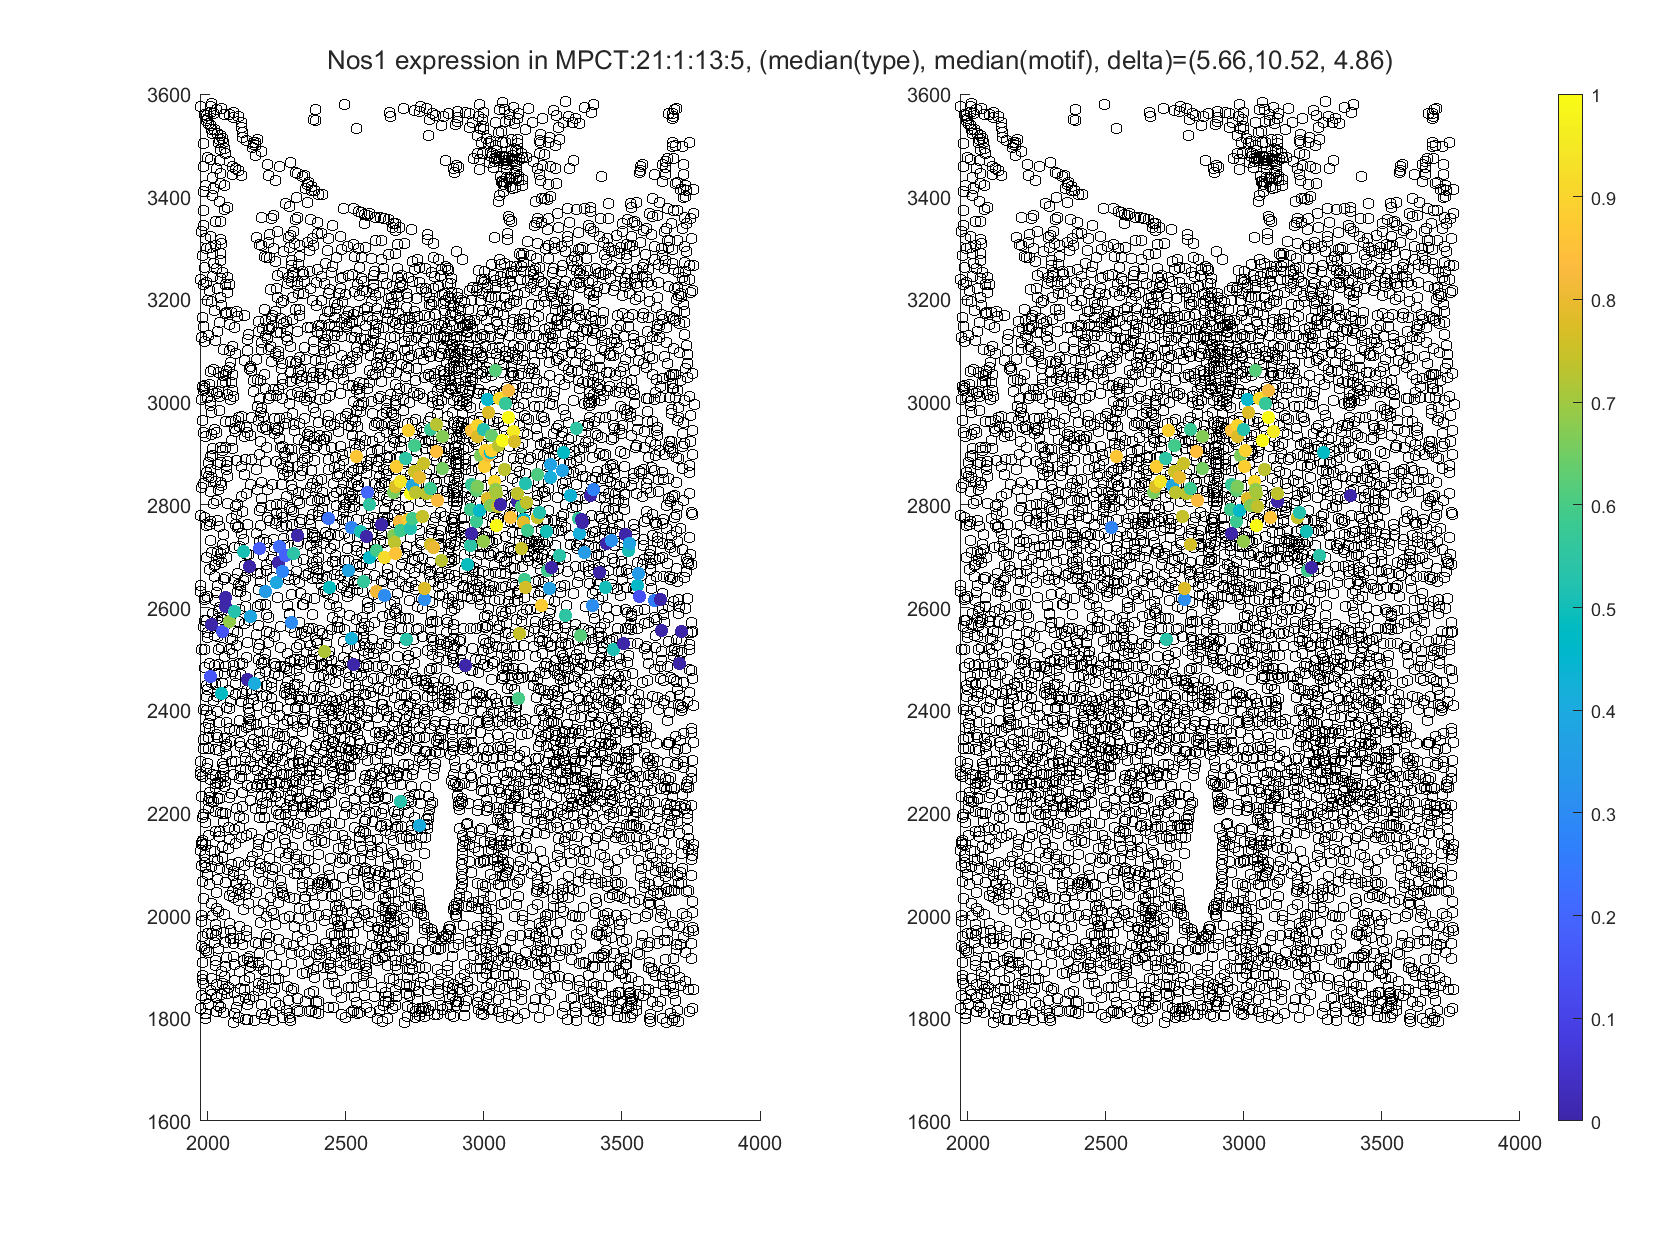

In [25]:
close(gcf);
    markerSize=30;
    gOntissueFoldero=strcat(outputFolderName, 'gOntissue/');
    if ~exist(gOntissueFoldero, 'dir')
        mkdir(gOntissueFoldero)
    end
    medAbses=abs(gnS3.deltaMedian);
    [~, sortVarID]=sort(medAbses, 'descend');
    gnS3=gnS3(sortVarID, :);
    
    cPTypes=cPTypes(:);
    xcoordsTotal=TOut.Centroid_X;
    ycoordsTotal=TOut.Centroid_Y;
    if options.isGEByTissue
        [~,~,  nodeSID]=unique(TOut.SID);
    else
        nodeSID=ones(length(xcoordsTotal),1);
    end
    if haveZ
        zcoordsTotal=G.Nodes.Coordinates(:, 3);
    end
    for igh=1:size(gnS3, 1)
        isVisible= any(igh==casePlotID);
        casei=gnS3(igh, :);
        mtni=casei.motifNumber;
        mtci=casei.cellType;
        gni=casei.geneName;
        if any(mtni>0) && any(mtci>0)

            if options.isGEByTissue
                mtsci=casei.section_id;
            else
                mtsci=1;
            end
            gOntissueFolder=strcat(gOntissueFoldero,gni, '/');
            if ~exist(gOntissueFolder, 'dir')
                mkdir(gOntissueFolder)
            end
            if isVisible
                  f=figure('visible','on');
            else
                 f=figure('visible','off');
            end
            f.Position(3:4)=2*f.Position(3:4);
            f.Position(1:2)=1/2*f.Position(1:2);
            tcl = tiledlayout(1,2);
            nexttile            
            gni=find(matches(geNames, gni));
            genExi=log(gExpression(:, gni)+1);
            mtpi=casei.motifPosition;
            cTNodes=find(cPTypes==mtci & nodeSID==mtsci);
            mnodes=ppHMNodesCell{mtni};
            mnodes=mnodes(:, mtpi);
            mnodes=unique(mnodes);
            mnodes=mnodes(cPTypes(mnodes)==mtci & nodeSID(mnodes)==mtsci);
            genExiCT=full(genExi(cTNodes));
            ascaleMax=quantile(genExiCT, 0.99);
            genExiCT(genExiCT>ascaleMax)=ascaleMax;
            genExiCT=genExiCT/ascaleMax;
            genExiMT=full(genExi(mnodes));
            genExiMT(genExiMT>ascaleMax)=ascaleMax;
            genExiMT=genExiMT/ascaleMax;
            if haveZ
                scatter3(xcoordsTotal(nodeSID==mtsci), ycoordsTotal(nodeSID==mtsci),zcoordsTotal(nodeSID==mtsci), markerSize,'k','filled')
                hold on
                scatter3(xcoordsTotal(cTNodes), ycoordsTotal(cTNodes),zcoordsTotal(cTNodes),  [],genExiCT,'filled')
            else
                scatter(xcoordsTotal(nodeSID==mtsci), ycoordsTotal(nodeSID==mtsci), markerSize,'k')
                hold on
                scatter(xcoordsTotal(cTNodes), ycoordsTotal(cTNodes), 1.5*markerSize,genExiCT,'filled')
            end

            clim([0,1]);
            nexttile
            if haveZ
                scatter3(xcoordsTotal(nodeSID==mtsci), ycoordsTotal(nodeSID==mtsci),zcoordsTotal(nodeSID==mtsci), markerSize,'k','filled')
                hold on
                scatter3(xcoordsTotal(mnodes), ycoordsTotal(mnodes),zcoordsTotal(mnodes),  [],genExiMT,'filled')
            else
                scatter(xcoordsTotal(nodeSID==mtsci), ycoordsTotal(nodeSID==mtsci), markerSize,'k')
                hold on
                scatter(xcoordsTotal(mnodes), ycoordsTotal(mnodes), 1.5*markerSize,genExiMT,'filled')
            end
            colorbar
            clim([0,1]);

            titleStr=sprintf('%s expression in MPCT:%d:%d:%d:%d, (median(type), median(motif), delta)=(%2.2f,%2.2f, %2.2f)',...
                geNames{gni},mtni,mtpi, mtci,mtsci,casei.typeMedian,casei.motifMedian, casei.deltaMedian);
            title(tcl,titleStr)
            motifAdd=sprintf( '%s_MPCT_%d_%d_%d_%d',geNames{gni},mtsci,mtni, mtci,mtpi);
            figname=strcat(gOntissueFolder,motifAdd, '.jpeg');
            % axis off
            % axis equal
            saveas(gcf,figname)
            if ~isVisible
                close(gcf);
            end
        end
    end

In [26]:
close all